In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import datetime
import time
import numpy as np
from funtions import *
import os
import warnings
from scipy.stats import rankdata
import scipy as sp
from jqdatasdk import *
from numpy import abs
from numpy import log
from numpy import sign
import pymysql
import tushare as ts
warnings.filterwarnings("ignore")
pd.set_option('expand_frame_repr', False)  # 当列太多时不换行
pd.set_option('display.max_rows', 500)  # 最多显示数据的行数

In [2]:
# 账号是申请时所填写的手机号；密码为聚宽官网登录密码，新申请用户默认为手机号后6位
auth('18578664901', 'Apple12320')

auth success 


In [3]:
# 查询当日剩余可调用条数
get_query_count()

{'total': 200000000, 'spare': 199995134}

In [4]:
factor_path = r'F:/jswork2/构建聚宽数据库/期货会员持仓/data/汇总/'
index_path = r"F:/jswork2/量化框架/多因子分析框架/data/input_data/"
daily_path = r'F:/jswork2/构建聚宽数据库/期货行情数据/data/日线行情/'
# output_path = r'F:/jswork2/期货策略/期货多因子/非量价因子/会员持仓/分析程序/data/会员因子构建数据/'
# muilt_factor_path = r'F:/jswork2/期货策略/期货多因子/非量价因子/会员持仓/分析程序/data/优秀席位多因子数据/'
# muilt_factor_path = r"F:/jswork2/构建聚宽数据库/期货期限结构构建数据/data/前5合约展期与回归数据/"
# muilt_factor_path = r"F:/jswork2/构建聚宽数据库/期货基差动量数据/data/近月与最大成交量对的基差动量/"
muilt_factor_path = r"F:/jswork2/构建聚宽数据库/期货截面动量数据/data/复权主连动量数据/"

input_path = r'F:/jswork2/量化框架/选股回测框架/data/input_data/'
output_path = r'F:/jswork2/量化框架/多因子分析框架/data/output_data/'

In [5]:
# 获取期货交易日历
is_trade_date = pd.read_pickle(index_path + "is_trade_date" + ".pkl")
is_trade_date

,Date
4,2015-01-05
5,2015-01-06
6,2015-01-07
7,2015-01-08
8,2015-01-09
...,...
2826,2022-09-27
2827,2022-09-28
2828,2022-09-29
2829,2022-09-30


In [6]:
future_list = [
#  'A8888.XDCE',
 'AG8888.XSGE',
 'AL8888.XSGE',
 'AP8888.XZCE',
 'AU8888.XSGE',
#  'B8888.XDCE',
 'BU8888.XSGE',
#  'C8888.XDCE',
 'CF8888.XZCE',
#  'CJ8888.XZCE',
#  'CS8888.XDCE',
#  'CU8888.XSGE',
 'EB8888.XDCE',
 'EG8888.XDCE',
 'FG8888.XZCE',
 'FU8888.XSGE',
 'HC8888.XSGE',
 'I8888.XDCE',
#  'J8888.XDCE',
#  'JD8888.XDCE',
 'JM8888.XDCE',
 'L8888.XDCE',
 'LH8888.XDCE',
 'LU8888.XINE',
 'M8888.XDCE',
 'MA8888.XZCE',
 'NI8888.XSGE',
#  'NR8888.XINE',
 'OI8888.XZCE',
 'P8888.XDCE',
#  'PB8888.XSGE',
#  'PF8888.XZCE',
#  'PG8888.XDCE',
 'PK8888.XZCE',
 'PP8888.XDCE',
 'RB8888.XSGE',
 'RM8888.XZCE',
#  'RU8888.XSGE',
#  'SA8888.XZCE',
#  'SC9999.XINE',
 'SF8888.XZCE',
#  'SM8888.XZCE',
 'SN8888.XSGE',
 'SP8888.XSGE',
 'SR8888.XZCE',
 'SS8888.XSGE',
 'TA8888.XZCE',
#  'UR8888.XZCE',
 'V8888.XDCE',
 'Y8888.XDCE',
#  'ZC8888.XZCE',
 'ZN8888.XSGE']
len(future_list)

34

In [7]:
# 期货主连
future_list = [
 'A9999.XDCE',
 'AG9999.XSGE',
 'AL9999.XSGE',
 'AP9999.XZCE',
 'AU9999.XSGE',
 'B9999.XDCE',
 'BU9999.XSGE',
 'C9999.XDCE',
 'CF9999.XZCE',
 'CJ9999.XZCE',
 'CS9999.XDCE',
 'CU9999.XSGE',
 'EB9999.XDCE',
 'EG9999.XDCE',
 'FG9999.XZCE',
 'FU9999.XSGE',
 'HC9999.XSGE',
 'I9999.XDCE',
 'J9999.XDCE',
 'JD9999.XDCE',
 'JM9999.XDCE',
 'L9999.XDCE',
 'LH9999.XDCE',
 'LU9999.XINE',
 'M9999.XDCE',
 'MA9999.XZCE',
 'NI9999.XSGE',
 'NR9999.XINE',
 'OI9999.XZCE',
 'P9999.XDCE',
 'PB9999.XSGE',
 'PF9999.XZCE',
 'PG9999.XDCE',
 'PK9999.XZCE',
 'PP9999.XDCE',
 'RB9999.XSGE',
 'RM9999.XZCE',
 'RU9999.XSGE',
 'SA9999.XZCE',
 'SC9999.XINE',
 'SF9999.XZCE',
 'SM9999.XZCE',
 'SN9999.XSGE',
 'SP9999.XSGE',
 'SR9999.XZCE',
 'SS9999.XSGE',
 'TA9999.XZCE',
 'UR9999.XZCE',
 'V9999.XDCE',
 'Y9999.XDCE',
 'ZC9999.XZCE',
 'ZN9999.XSGE']
len(future_list)

52

In [8]:
future_list = []
file_list = os.listdir(muilt_factor_path)
for i in file_list:
    future_list.append(i[:-4])
future_list

['A9999.XDCE',
 'AG9999.XSGE',
 'AL9999.XSGE',
 'AP9999.XZCE',
 'AU9999.XSGE',
 'BU9999.XSGE',
 'C9999.XDCE',
 'CF9999.XZCE',
 'CJ9999.XZCE',
 'CU9999.XSGE',
 'CY9999.XZCE',
 'EB9999.XDCE',
 'EG9999.XDCE',
 'FG9999.XZCE',
 'FU9999.XSGE',
 'HC9999.XSGE',
 'I9999.XDCE',
 'J9999.XDCE',
 'JD9999.XDCE',
 'JM9999.XDCE',
 'L9999.XDCE',
 'LH9999.XDCE',
 'LU9999.XINE',
 'M9999.XDCE',
 'MA9999.XZCE',
 'NR9999.XINE',
 'OI9999.XZCE',
 'P9999.XDCE',
 'PB9999.XSGE',
 'PF9999.XZCE',
 'PG9999.XDCE',
 'PK9999.XZCE',
 'PP9999.XDCE',
 'RB9999.XSGE',
 'RM9999.XZCE',
 'RU9999.XSGE',
 'SA9999.XZCE',
 'SC9999.XINE',
 'SF9999.XZCE',
 'SM9999.XZCE',
 'SN9999.XSGE',
 'SP9999.XSGE',
 'SR9999.XZCE',
 'SS9999.XSGE',
 'TA9999.XZCE',
 'UR9999.XZCE',
 'V9999.XDCE',
 'Y9999.XDCE',
 'ZC9999.XZCE',
 'ZN9999.XSGE']

In [157]:
# 获取因子数据
# 交易所不公布原油的持仓
# start_date = "2015-01-01"
# all_factor_data = pd.DataFrame()
# for code in future_list:
# #     code = code.replace("9999", "8888")
#     temp_df = pd.read_pickle(muilt_factor_path+code + ".pkl")
    
#     for n in [5,10,15,20,25,30,35,50]:
#         temp_df[f"ma{n}_rollover_benefits"] = temp_df['rollover_benefits'].rolling(n,min_periods=5).mean()
    
# #     temp_df['code'] = temp_df['code'].apply(lambda x: x[:-4])
#     all_factor_data = all_factor_data.append(temp_df)

# # all_factor_data.rename(columns={"day":"Date", "code":"Ticker"},inplace=True)
# # del all_factor_data['zhulicode']
# # del all_factor_data['cizhulicode']
# # del all_factor_data['jin_price']
# # del all_factor_data['ci_jin_price']
# # del all_factor_data['diff_days']

# del all_factor_data['vol_code']
# del all_factor_data['vol_close']
# del all_factor_data['date_code']
# del all_factor_data['date_close']

# all_factor_data = all_factor_data[all_factor_data['Date']>=start_date]
# all_factor_data.reset_index(drop=True,inplace=True)
# all_factor_data

In [9]:
# 获取基差动量因子数据
# start_date = "2015-01-01"
# all_factor_data = pd.DataFrame()
# for code in future_list:
# #     code = code.replace("9999", "8888")
#     temp_df = pd.read_pickle(muilt_factor_path+code + ".pkl")
#     all_factor_data = all_factor_data.append(temp_df)
    
# del all_factor_data['vol_code']
# del all_factor_data['vol_close']
# del all_factor_data['vol_vol']

# del all_factor_data['date_code']
# del all_factor_data['date_close']
# del all_factor_data['date_vol']

# del all_factor_data['jin_yue_code']
# del all_factor_data['cijin_yue_code']
# del all_factor_data['jin_yue_close']
# del all_factor_data['cijin_yue_close']


# for N in [3, 5, 10, 15, 20, 25, 30, 50, 80, 100, 120, 150]:
#     del all_factor_data[f'vol_pct_chg{N}']
#     del all_factor_data[f'date_pct_chg{N}']
#     del all_factor_data[f'jin_yue_pct_chg{N}']
#     del all_factor_data[f'cijin_yue_pct_chg{N}']

# all_factor_data = all_factor_data[all_factor_data['Date']>=start_date]
# all_factor_data.reset_index(drop=True,inplace=True)
# all_factor_data

In [10]:
# 获取复权主连动量因子数据
start_date = "2015-01-01"
all_factor_data = pd.DataFrame()
for code in future_list:
#     code = code.replace("9999", "8888")
    temp_df = pd.read_pickle(muilt_factor_path+code + ".pkl")
    all_factor_data = all_factor_data.append(temp_df)
    
all_factor_data = all_factor_data[all_factor_data['Date']>=start_date]
all_factor_data.reset_index(drop=True,inplace=True)
all_factor_data

,Ticker,Date,pct_chg3,pct_chg5,pct_chg10,pct_chg15,pct_chg20,pct_chg25,pct_chg30,pct_chg50,pct_chg80,pct_chg100
0,A9999.XDCE,2015-01-05,-0.006628,0.014207,0.042660,0.029533,0.042421,0.044357,0.049021,0.058143,0.029006,0.047170
1,A9999.XDCE,2015-01-06,-0.002658,0.011229,0.038515,0.031852,0.025274,0.042843,0.049265,0.056025,0.041216,0.050889
2,A9999.XDCE,2015-01-07,-0.001109,-0.004861,0.042339,0.033019,0.028068,0.046944,0.064774,0.058844,0.037813,0.045573
3,A9999.XDCE,2015-01-08,0.001335,-0.002658,0.040915,0.041878,0.035172,0.047210,0.055557,0.064302,0.047182,0.037806
4,A9999.XDCE,2015-01-09,0.001331,-0.000222,0.027575,0.046172,0.029216,0.048848,0.060941,0.060967,0.044893,0.041691
...,...,...,...,...,...,...,...,...,...,...,...,...
83507,ZN9999.XSGE,2023-01-04,-0.029204,-0.029613,-0.011768,-0.063117,-0.058740,-0.033818,-0.014052,-0.040245,-0.004919,0.000207
83508,ZN9999.XSGE,2023-01-05,-0.025036,-0.033175,-0.010466,-0.063700,-0.055899,-0.025611,-0.007503,-0.024248,-0.008885,0.004879
83509,ZN9999.XSGE,2023-01-06,-0.009593,-0.023951,-0.002362,-0.051721,-0.061841,-0.049204,-0.013781,-0.026389,0.016023,-0.015808
83510,ZN9999.XSGE,2023-01-09,0.017749,-0.010517,0.015549,-0.021157,-0.055465,-0.044558,-0.005051,0.011561,0.013580,-0.019110


In [11]:
# 获取期货的指数日线行情数据
rename_dict = {
    'trade_date':'Date',
    'security':'Ticker',
    'open':'Open',
    'close':'Close',
    'high':'High',
    'low':'Low',
    'volume':'Volume',
    'money':'Value' 
}
all_trade_df = pd.read_pickle(input_path+"post_zhulian_data.pkl")
all_trade_df = all_trade_df[all_trade_df['paused']==0]
all_trade_df.rename(columns=rename_dict,inplace=True)
all_trade_df = all_trade_df[all_trade_df["Ticker"].isin(future_list)]
all_trade_df['Date'] = all_trade_df['Date'].astype(str)
all_trade_df = all_trade_df[['Date', 'Ticker','Open','Close','Low','High','Volume','Value','high_limit']]
all_trade_df

,Date,Ticker,Open,Close,Low,High,Volume,Value,high_limit
0,2015-01-05,A9999.XDCE,3938.36,3946.25,3901.50,3952.40,72400.0,3.248361e+09,4111.23
1,2015-01-06,A9999.XDCE,3948.89,3951.52,3936.60,3991.01,176706.0,7.977943e+09,4093.68
2,2015-01-07,A9999.XDCE,3961.17,3953.27,3931.33,3973.46,102236.0,4.604084e+09,4119.13
3,2015-01-08,A9999.XDCE,3957.66,3951.52,3940.11,3969.95,93610.0,4.220491e+09,4109.47
4,2015-01-09,A9999.XDCE,3955.91,3956.78,3936.60,3965.56,106146.0,4.779245e+09,4113.86
...,...,...,...,...,...,...,...,...,...
1883,2022-09-27,ZN9999.XSGE,24413.30,24577.40,24341.50,24808.10,162221.0,1.943660e+10,27632.90
1884,2022-09-28,ZN9999.XSGE,24654.30,23849.40,23849.40,24654.30,236290.0,2.789449e+10,27514.90
1885,2022-09-29,ZN9999.XSGE,24013.40,24387.70,24013.40,24459.40,182021.0,2.153816e+10,27109.90
1886,2022-09-30,ZN9999.XSGE,24690.10,24269.80,24259.50,24792.70,172268.0,2.057620e+10,27171.50


In [12]:
# 固定间隔周期的因子IC分析
period_type = 15
begin_date = None
factor_list,final_data = wudi_transfer_every_period_data(all_trade_df, all_factor_data, is_trade_date, period_type, begin_date=None)
final_data

,Date,Ticker,Open,Close,Low,High,Volume,Value,high_limit,pct_chg,open_chg,pct_chg3,pct_chg5,pct_chg10,pct_chg15,pct_chg20,pct_chg25,pct_chg30,pct_chg50,pct_chg80,pct_chg100,is_trade,pre_pct_chg,before_15days_chg,15days_chg_fators,pct_chg_5
0,2015-01-05,A9999.XDCE,3938.36,3946.25,3901.50,3952.40,72400.0,3.248361e+09,4111.23,0.000000,0.002003,-0.006628,0.014207,0.042660,0.029533,0.042421,0.044357,0.049021,0.058143,0.029006,0.047170,1.0,0.000000,[0.0],0.0000,-2.36
1,2015-01-26,A9999.XDCE,3879.56,3853.23,3853.23,3900.62,82258.0,3.630911e+09,4044.54,-0.007909,-0.006787,-0.015471,-0.023356,-0.026387,-0.023572,-0.009699,0.018083,0.005265,0.025428,0.011992,0.004316,1.0,-0.007909,"[0.0013354450427620623, 0.00044286755476363737...",-0.0236,-0.55
2,2015-02-16,A9999.XDCE,3873.42,3832.17,3822.52,3874.30,86658.0,3.793866e+09,4031.37,-0.009527,-0.010650,-0.008853,-0.010874,-0.008179,-0.005466,-0.028694,-0.031708,-0.028908,0.012286,0.027554,-0.003334,1.0,-0.009527,"[0.011159468809284645, -0.00495350633817826, -...",-0.0055,-4.28
3,2015-03-16,A9999.XDCE,3646.14,3668.08,3633.85,3670.71,47218.0,1.965364e+09,3804.09,0.006260,0.006017,-0.000956,-0.003098,-0.021535,-0.042819,-0.053228,-0.050647,-0.048051,-0.057284,-0.023844,-0.005355,1.0,0.006260,"[0.0, -0.01831860277597297, -0.000699101800386...",-0.0428,-5.36
4,2015-04-07,A9999.XDCE,3494.32,3471.51,3468.00,3510.12,34076.0,1.354149e+09,3645.26,-0.010506,-0.006528,-0.019577,-0.017874,-0.049953,-0.053589,-0.056522,-0.073970,-0.094114,-0.120108,-0.082984,-0.079009,1.0,-0.010506,"[-0.002633530348302049, 0.00024054099857329092...",-0.0536,5.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,2022-05-31,ZN9999.XSGE,25612.40,25636.90,25495.00,25724.90,137499.0,1.798475e+10,28562.10,0.005566,0.000957,0.032098,0.036182,0.019680,0.018493,-0.058913,-0.075648,-0.057879,0.038120,0.058882,0.090950,1.0,0.005566,"[-0.0032973930730908485, -0.005644042665136184...",0.0185,-3.47
121,2022-06-22,ZN9999.XSGE,25015.70,24746.60,24731.90,25299.40,160696.0,2.058416e+10,27691.40,-0.002760,-0.010757,-0.018814,-0.019956,-0.036565,-0.034727,0.000198,-0.015731,-0.016876,-0.071763,0.018597,0.025630,1.0,-0.002760,"[-0.0009556537646907559, 0.0072582030578938195...",-0.0347,-10.00
122,2022-07-13,ZN9999.XSGE,23042.90,22271.80,22119.60,23096.90,307213.0,3.549094e+10,25871.70,-0.033464,-0.033464,-0.033875,-0.009394,-0.056388,-0.100006,-0.117966,-0.132914,-0.131260,-0.182440,-0.098143,-0.094745,1.0,-0.033464,"[-0.003952058060501251, -0.0474221868813085, -...",-0.1000,5.71
123,2022-08-03,ZN9999.XSGE,23835.70,23542.60,23244.60,23910.20,218388.0,2.585309e+10,26632.60,-0.009200,-0.012297,-0.011679,0.042912,0.049421,0.057059,0.047129,-0.002546,-0.048653,-0.048465,-0.116925,-0.145583,1.0,-0.009200,"[-0.028884059662892092, -0.013625540374968215,...",0.0571,7.60


In [13]:
final_data.to_pickle(output_path +f"jiemian_mon1_final_data_{period_type}.pkl")

In [14]:
# final_data.to_pickle(output_path +f"final_data_{period_type}.pkl")

In [16]:
 # 切片出只包含因子字段数据
df = final_data.copy()
fac_list = ['Date', 'Ticker']
for fac in factor_list:
    fac_list.append(fac)
    
# fac_list.append("150_basis_momentum")
df = df[fac_list]
df

,Date,Ticker,open_chg,pct_chg3,pct_chg5,pct_chg10,pct_chg15,pct_chg20,pct_chg25,pct_chg30,pct_chg50,pct_chg80
0,2015-01-05,A9999.XDCE,0.002003,-0.006628,0.014207,0.042660,0.029533,0.042421,0.044357,0.049021,0.058143,0.029006
1,2015-01-26,A9999.XDCE,-0.006787,-0.015471,-0.023356,-0.026387,-0.023572,-0.009699,0.018083,0.005265,0.025428,0.011992
2,2015-02-16,A9999.XDCE,-0.010650,-0.008853,-0.010874,-0.008179,-0.005466,-0.028694,-0.031708,-0.028908,0.012286,0.027554
3,2015-03-16,A9999.XDCE,0.006017,-0.000956,-0.003098,-0.021535,-0.042819,-0.053228,-0.050647,-0.048051,-0.057284,-0.023844
4,2015-04-07,A9999.XDCE,-0.006528,-0.019577,-0.017874,-0.049953,-0.053589,-0.056522,-0.073970,-0.094114,-0.120108,-0.082984
...,...,...,...,...,...,...,...,...,...,...,...,...
120,2022-05-31,ZN9999.XSGE,0.000957,0.032098,0.036182,0.019680,0.018493,-0.058913,-0.075648,-0.057879,0.038120,0.058882
121,2022-06-22,ZN9999.XSGE,-0.010757,-0.018814,-0.019956,-0.036565,-0.034727,0.000198,-0.015731,-0.016876,-0.071763,0.018597
122,2022-07-13,ZN9999.XSGE,-0.033464,-0.033875,-0.009394,-0.056388,-0.100006,-0.117966,-0.132914,-0.131260,-0.182440,-0.098143
123,2022-08-03,ZN9999.XSGE,-0.012297,-0.011679,0.042912,0.049421,0.057059,0.047129,-0.002546,-0.048653,-0.048465,-0.116925


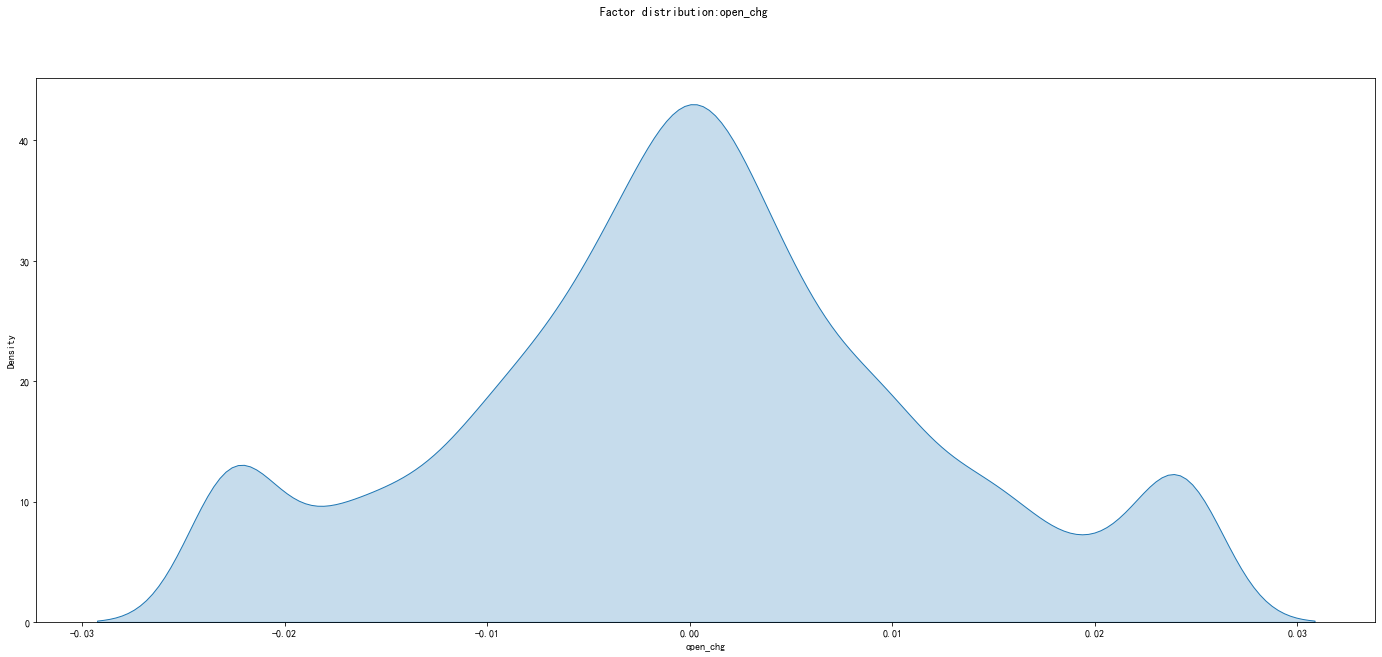

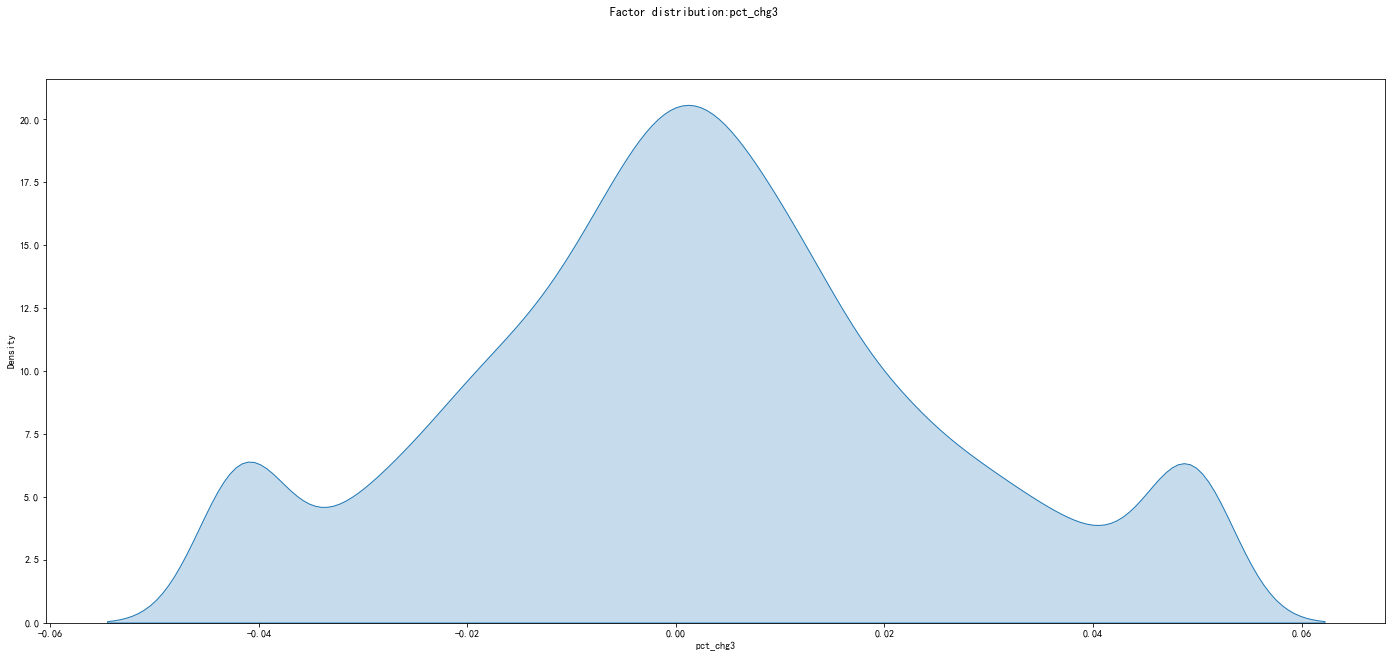

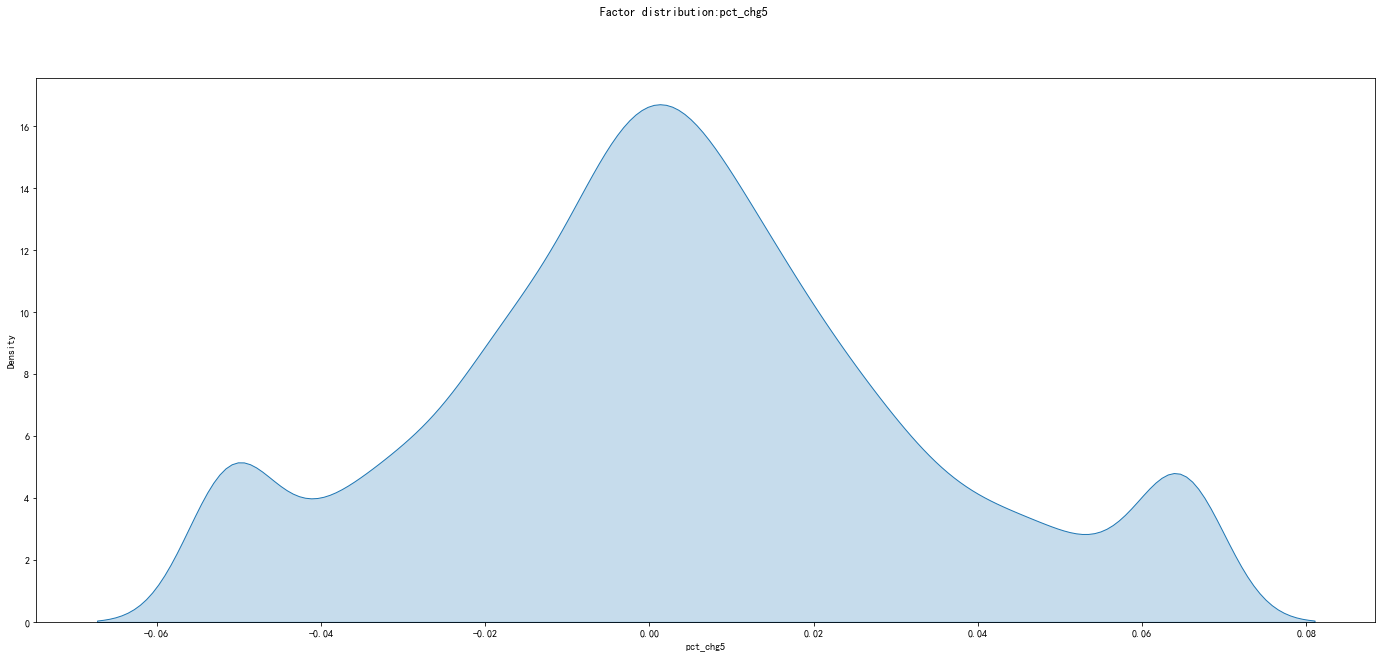

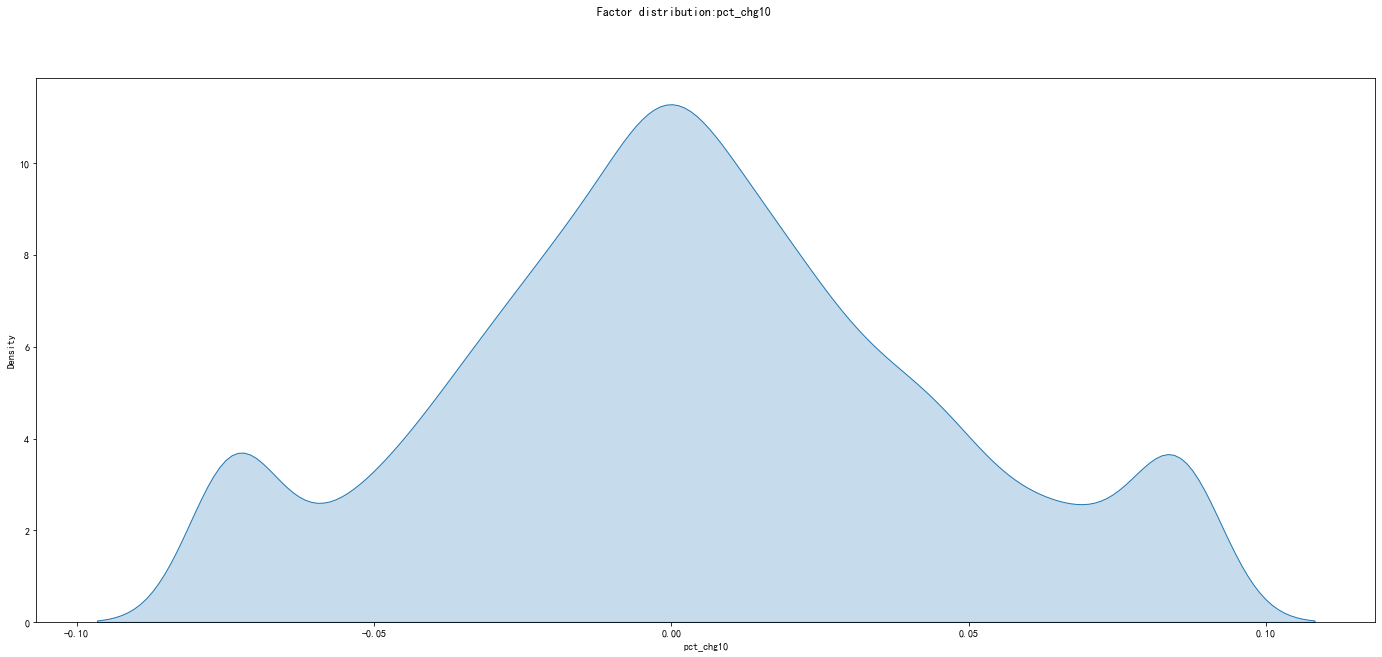

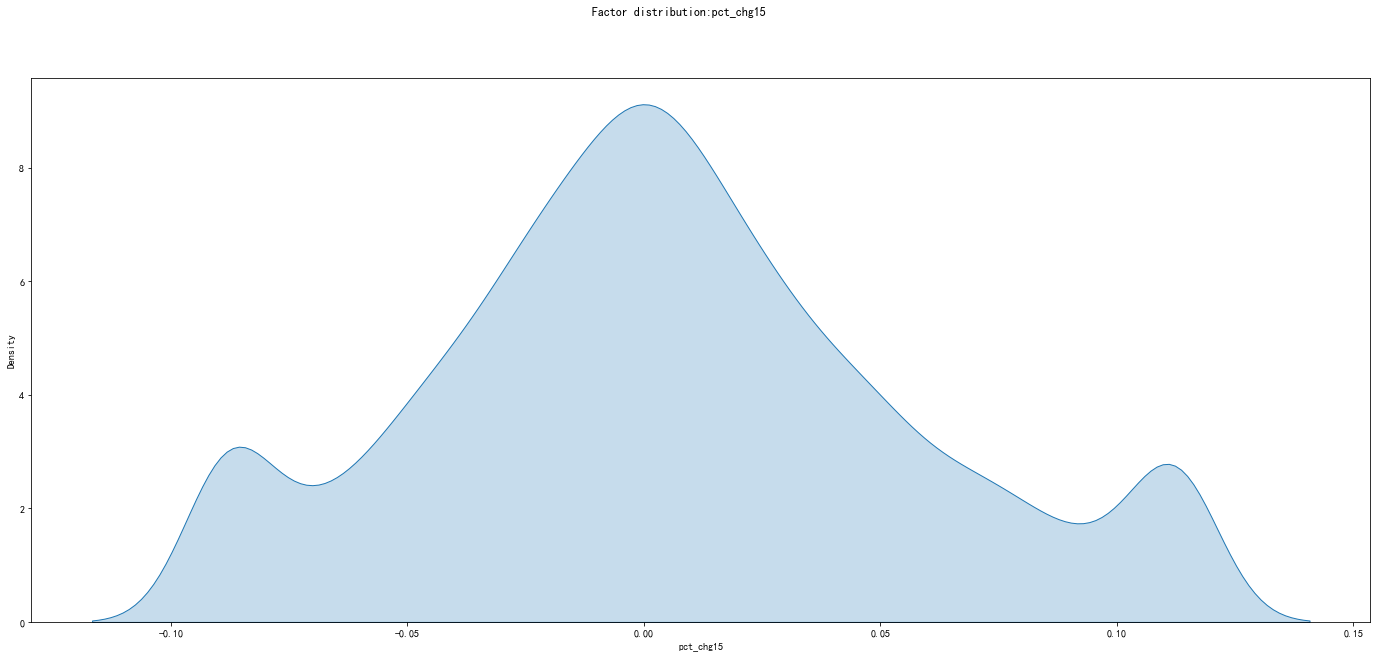

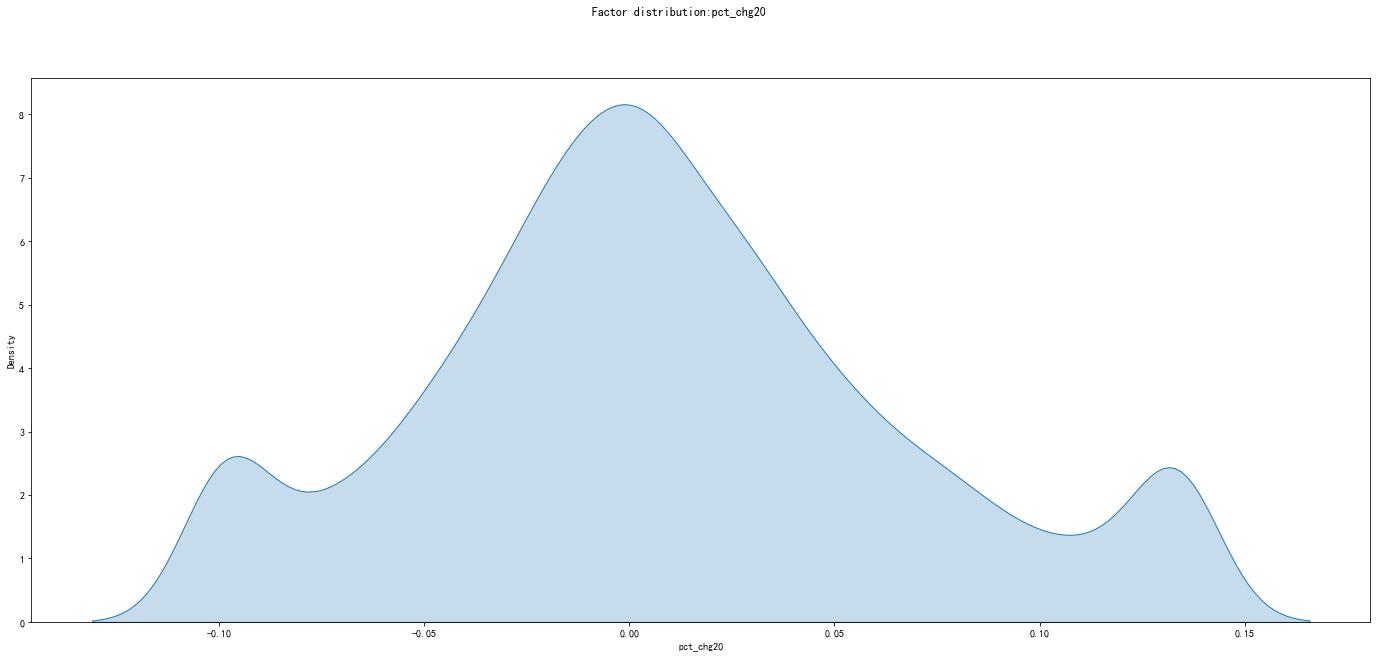

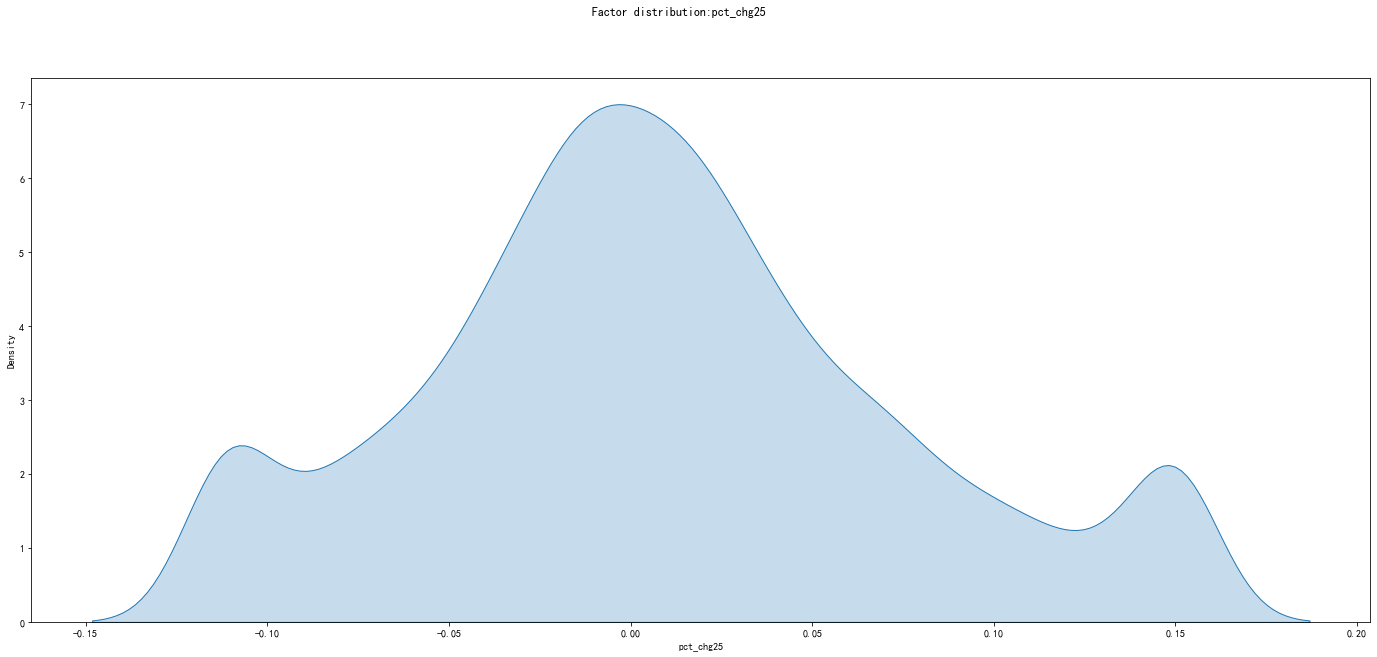

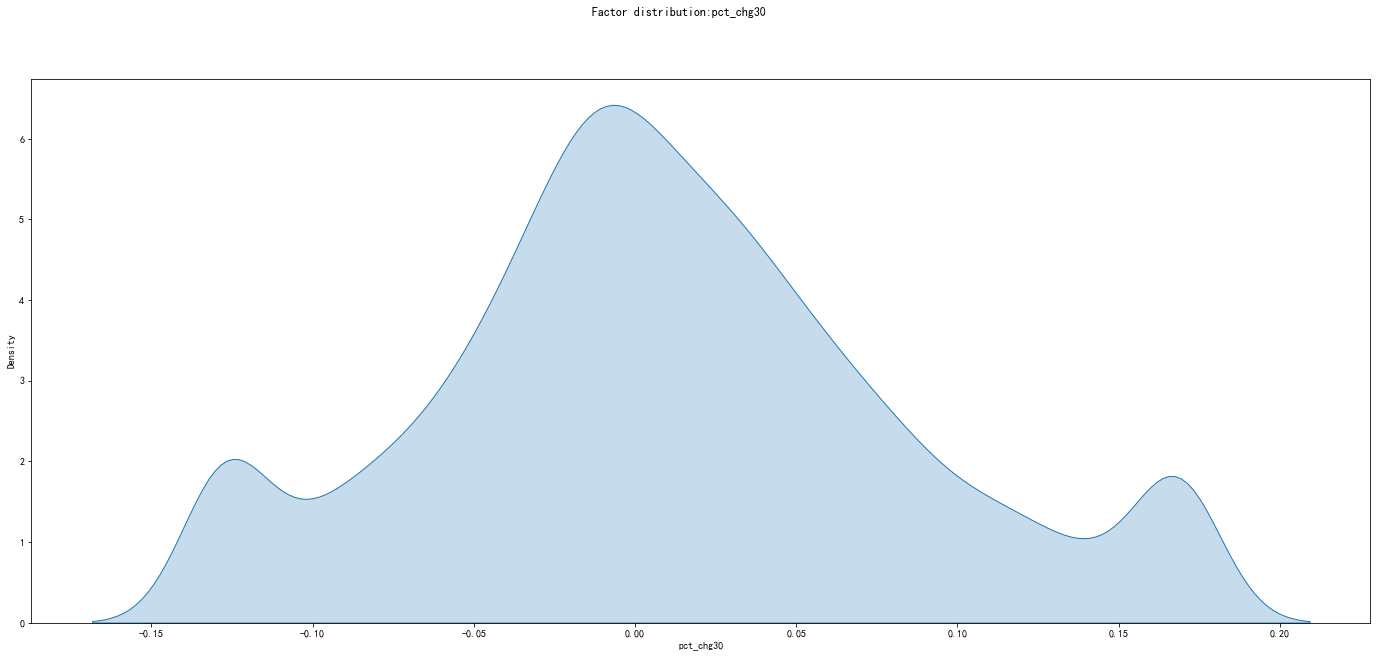

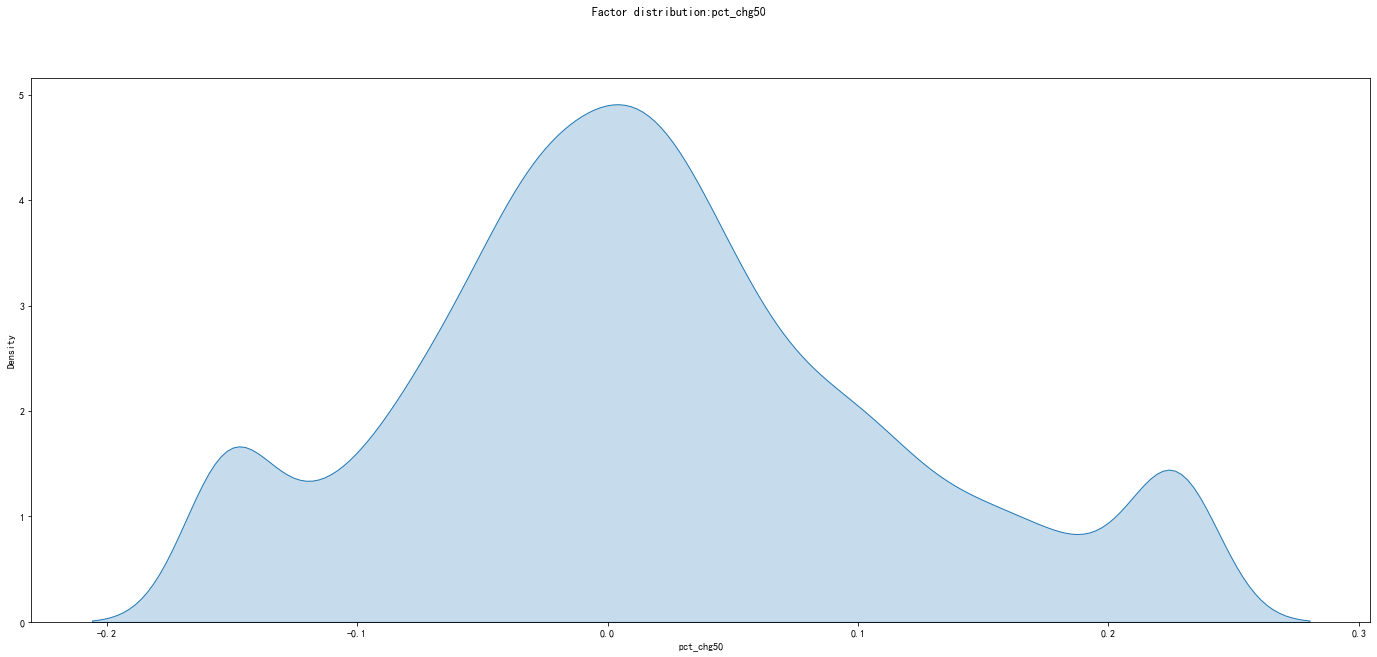

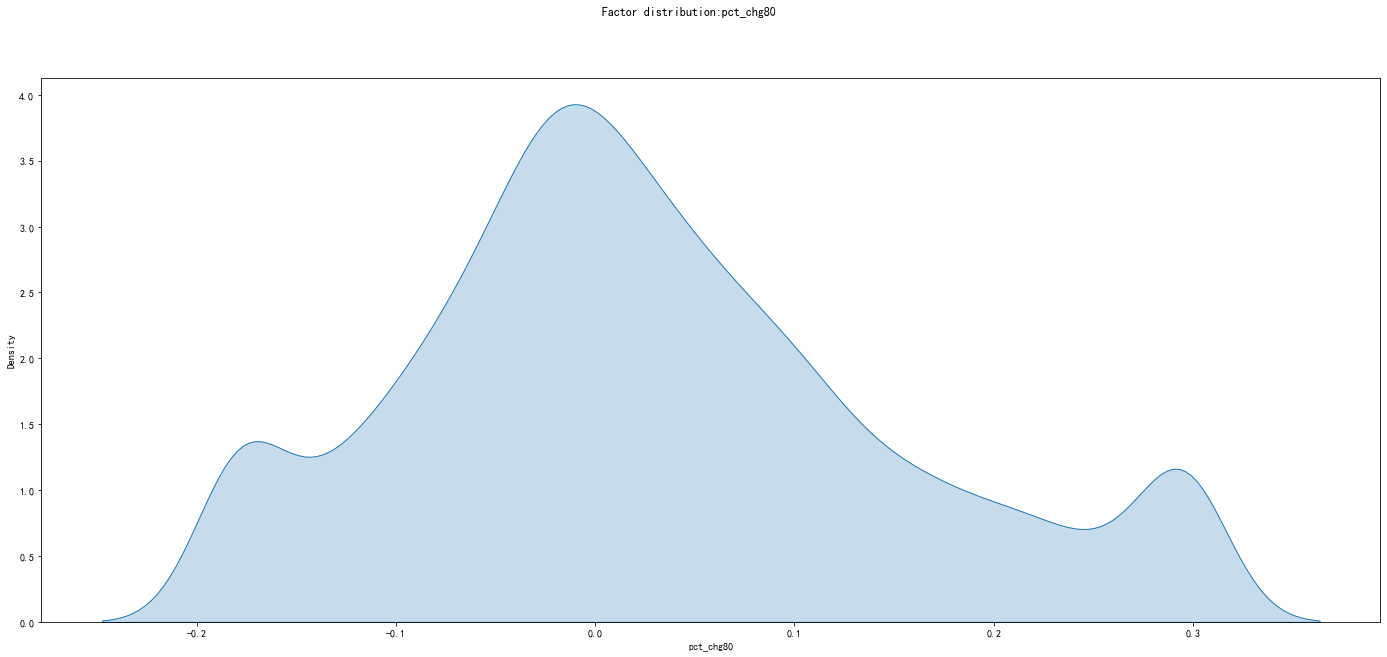

In [17]:
# 因子分布
for fac in factor_list:
    plot_factor(df,fac,ifyear=False)

In [18]:
# 计算因子自相关性 #一阶自回归的时间序列
auto_corr = get_factor_atuo_corr(df)
plot_atuo_corr(auto_corr)

ValueError: Index contains duplicate entries, cannot reshape

In [19]:
# 获取因子IC值数据
ic_ = getIC(df, ret=final_data[['Date', 'Ticker', 'pct_chg_5']], method='spearman')
ic_

pct_chg_5,open_chg,pct_chg3,pct_chg5,pct_chg10,pct_chg15,pct_chg20,pct_chg25,pct_chg30,pct_chg50,pct_chg80
Date,,,,,,,,,,
2015-01-05,0.271003,-0.170317,-0.282917,-0.086149,-0.103066,0.051328,0.020871,0.001548,0.004901,0.253031
2015-01-26,-0.558795,-0.411894,-0.355665,-0.241810,-0.582923,-0.493591,-0.489217,-0.449545,-0.654213,-0.581024
2015-02-16,-0.147373,0.085495,0.051122,0.090391,0.211166,0.449326,0.100602,0.055988,-0.074176,-0.062343
2015-03-16,-0.142763,0.189710,-0.117898,-0.244659,0.131910,0.178262,0.388506,0.318725,0.251890,-0.031226
2015-04-07,-0.197984,-0.196059,-0.135632,-0.106169,-0.022660,-0.076367,-0.239409,-0.181768,0.036047,-0.124575
2015-04-28,0.042075,-0.370334,-0.299179,-0.401337,-0.360920,-0.316972,-0.235030,-0.264600,-0.405281,-0.293744
2015-05-20,-0.037800,-0.425068,-0.469075,-0.585187,-0.407115,-0.035828,0.118555,0.252767,0.009313,0.128739
2015-06-10,-0.133048,-0.172104,0.155236,0.251904,-0.094805,0.121733,0.083858,-0.004383,-0.007341,0.427765
2015-07-02,-0.024215,0.319321,0.213136,0.267667,0.422660,0.323327,0.279912,0.033417,-0.025529,-0.163581


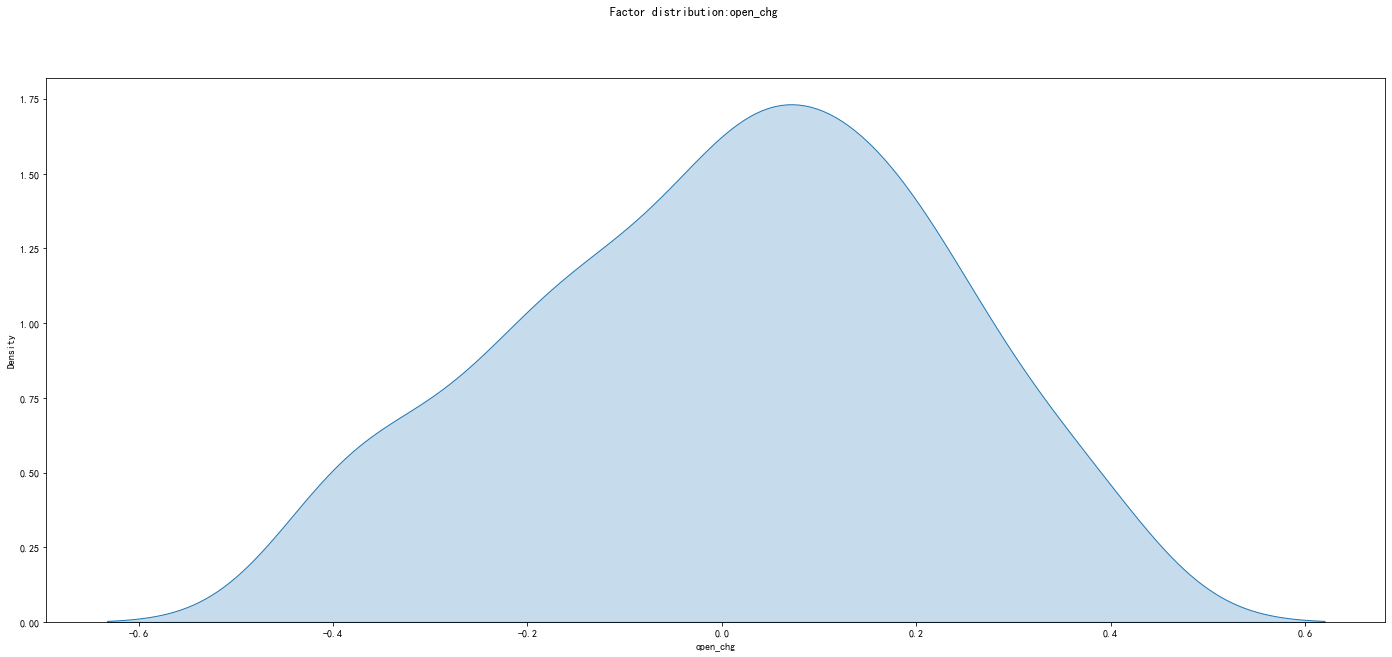

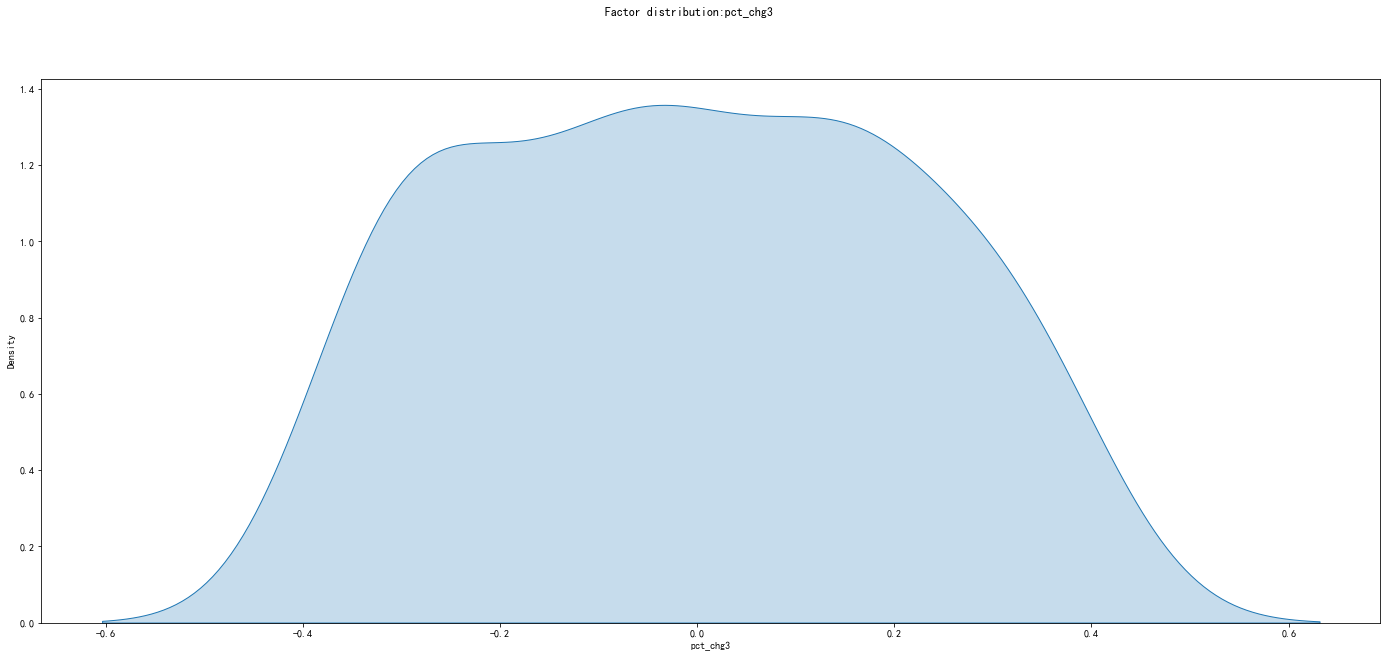

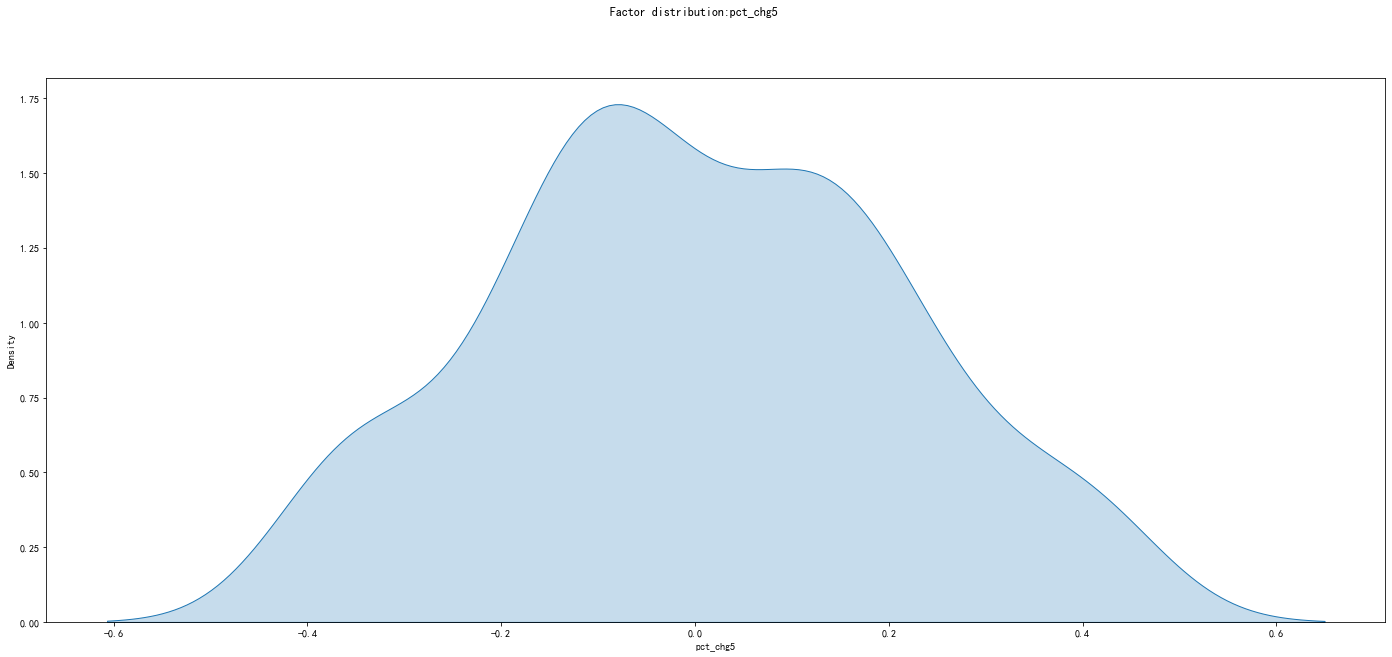

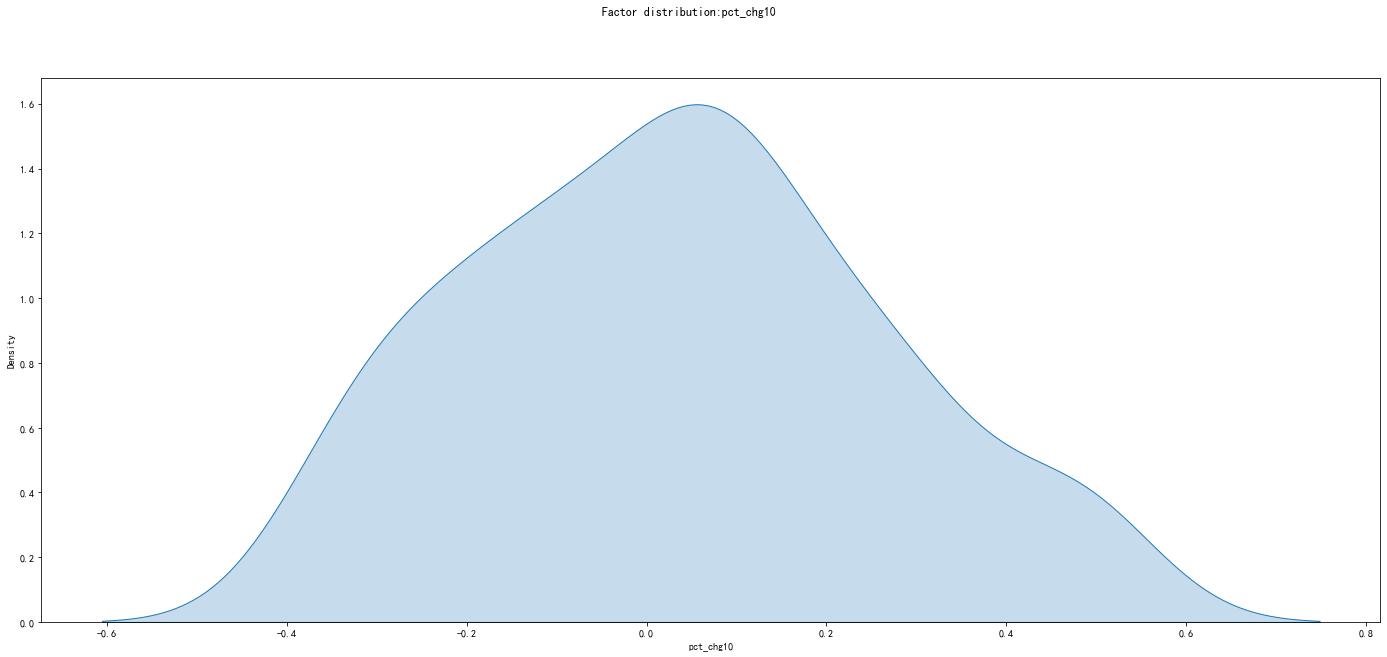

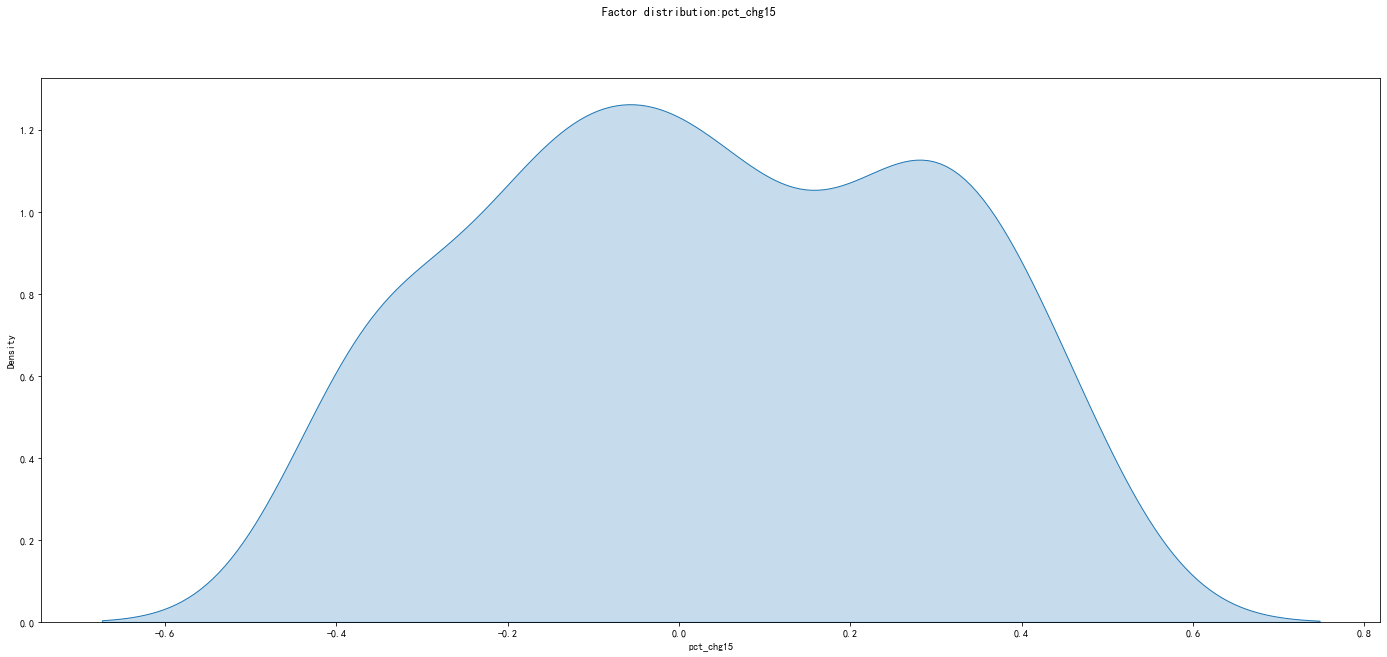

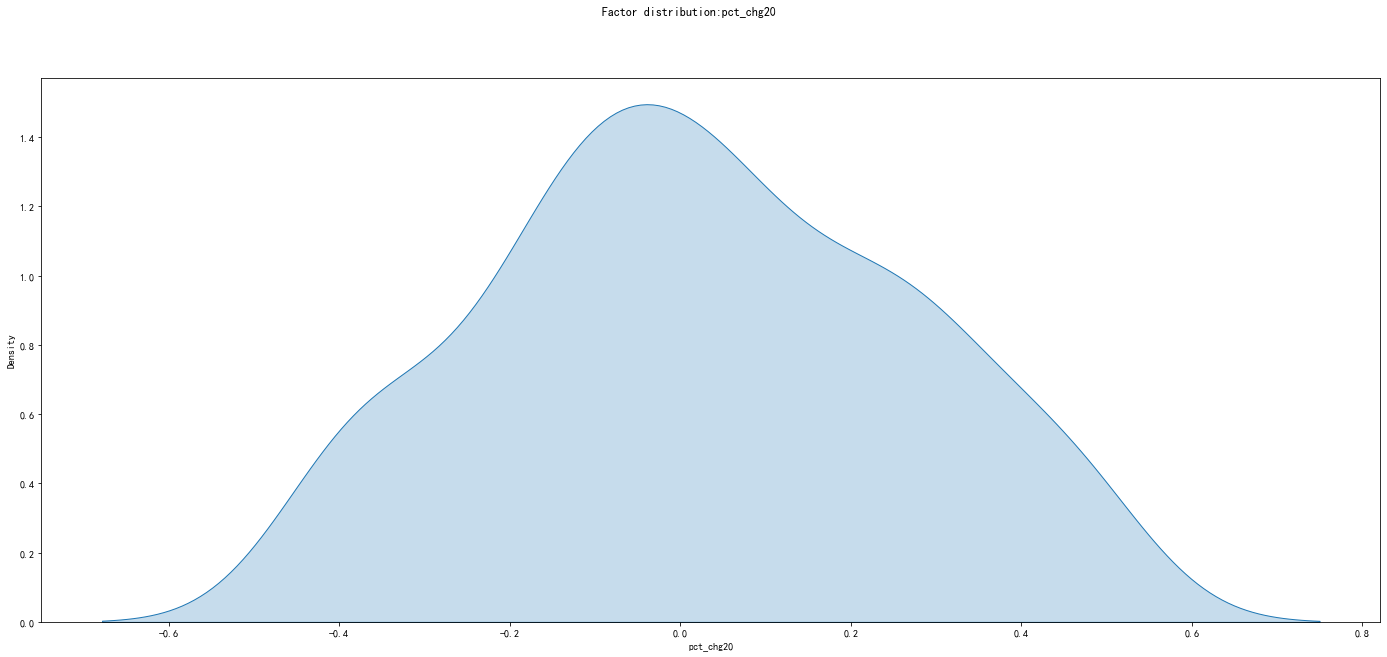

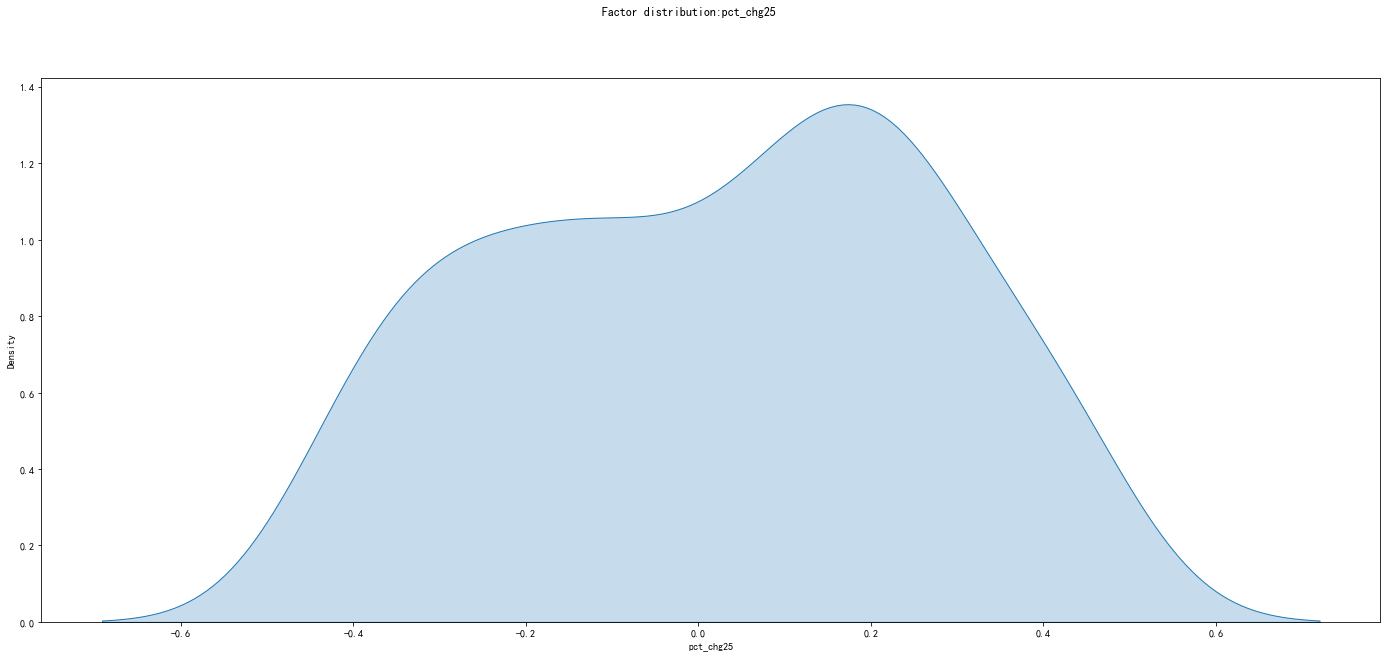

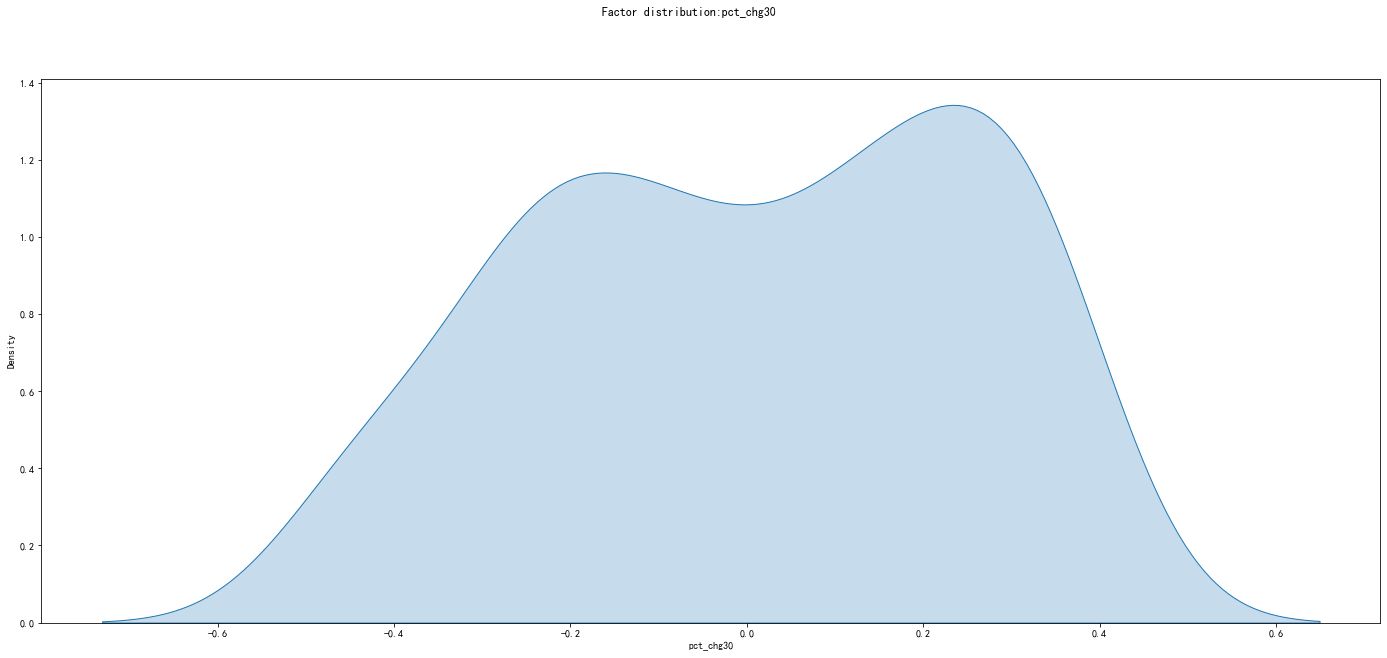

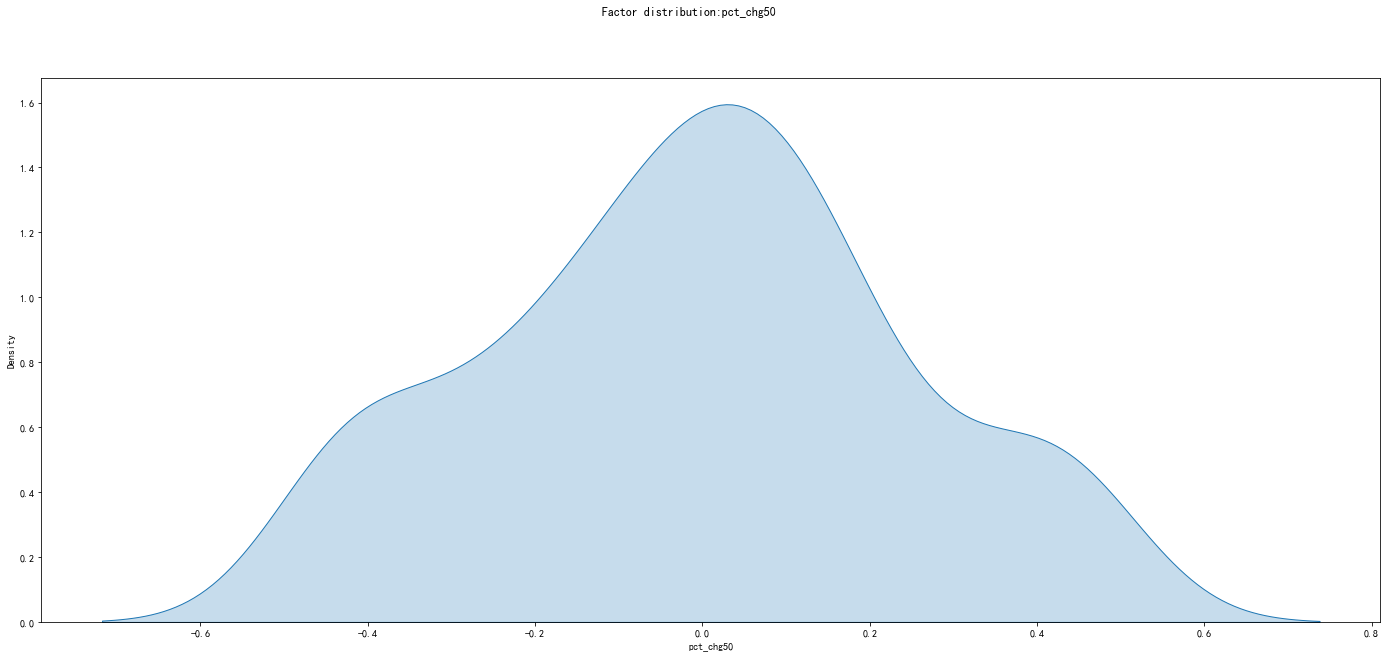

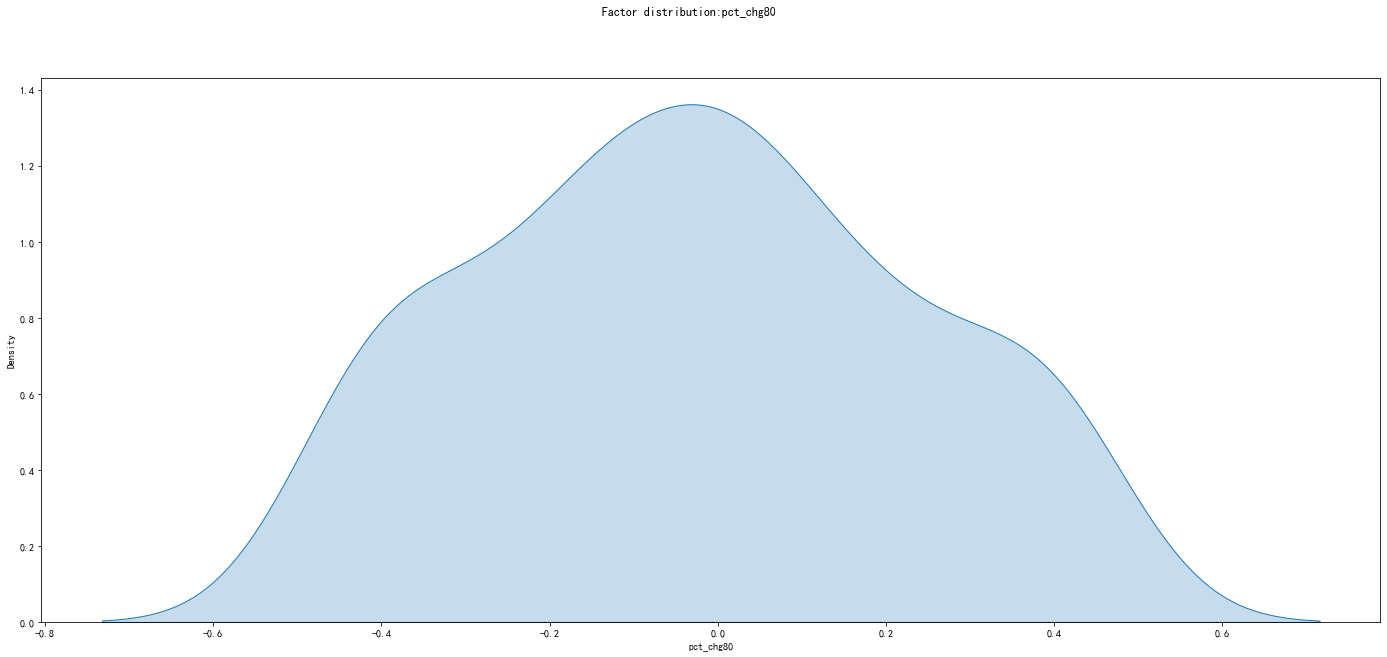

In [20]:
# 因子IC值分布图
ic_fenbu = ic_.reset_index()
# ic_fenbu
for fac in factor_list:
    plot_factor(ic_fenbu,fac)

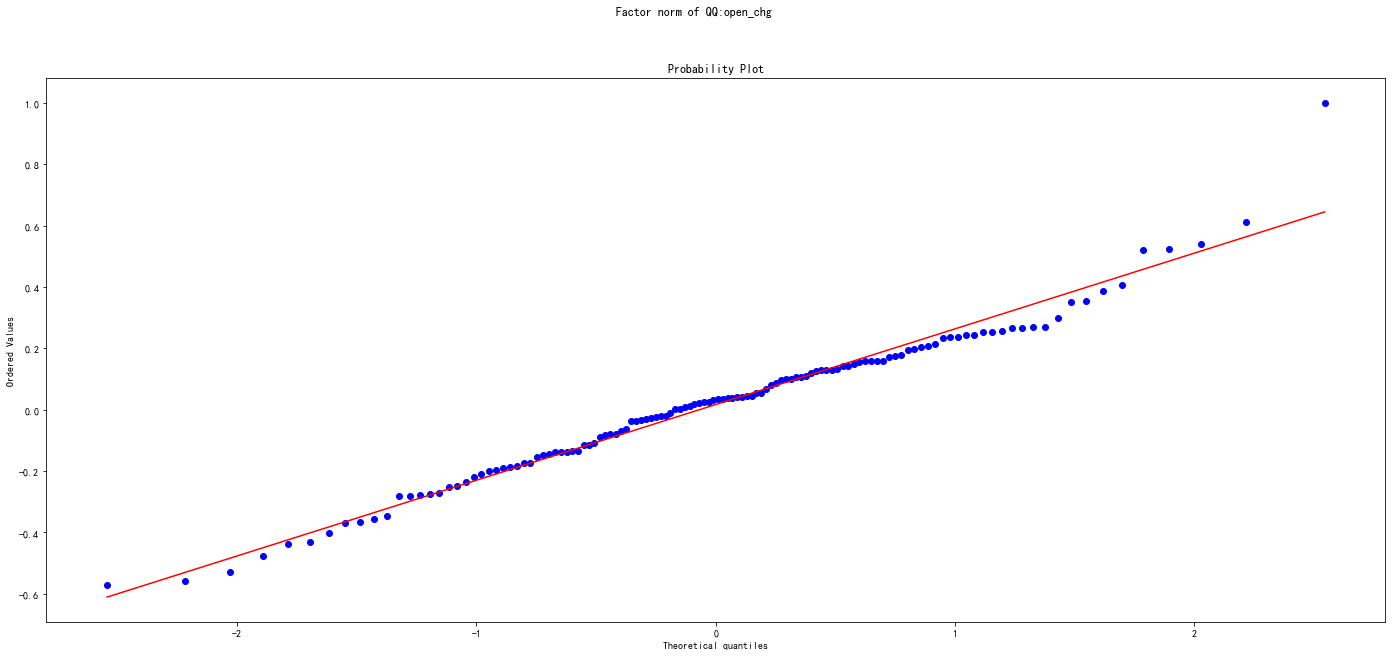

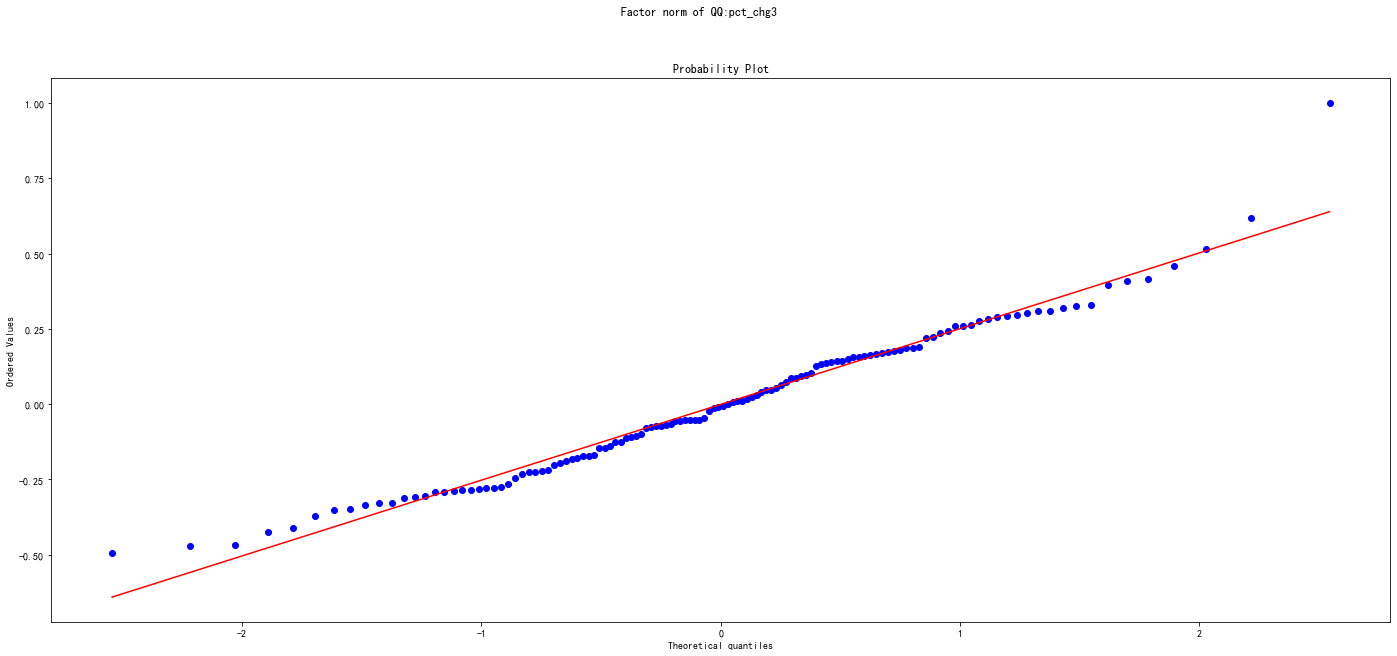

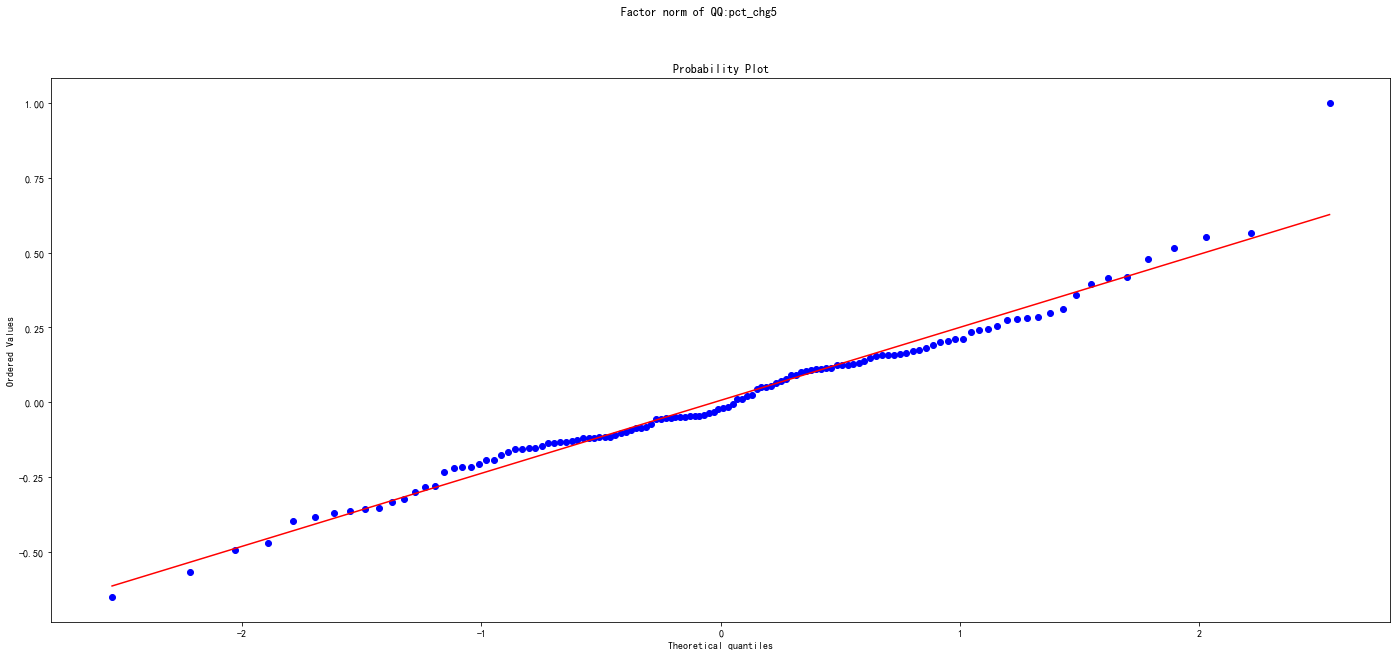

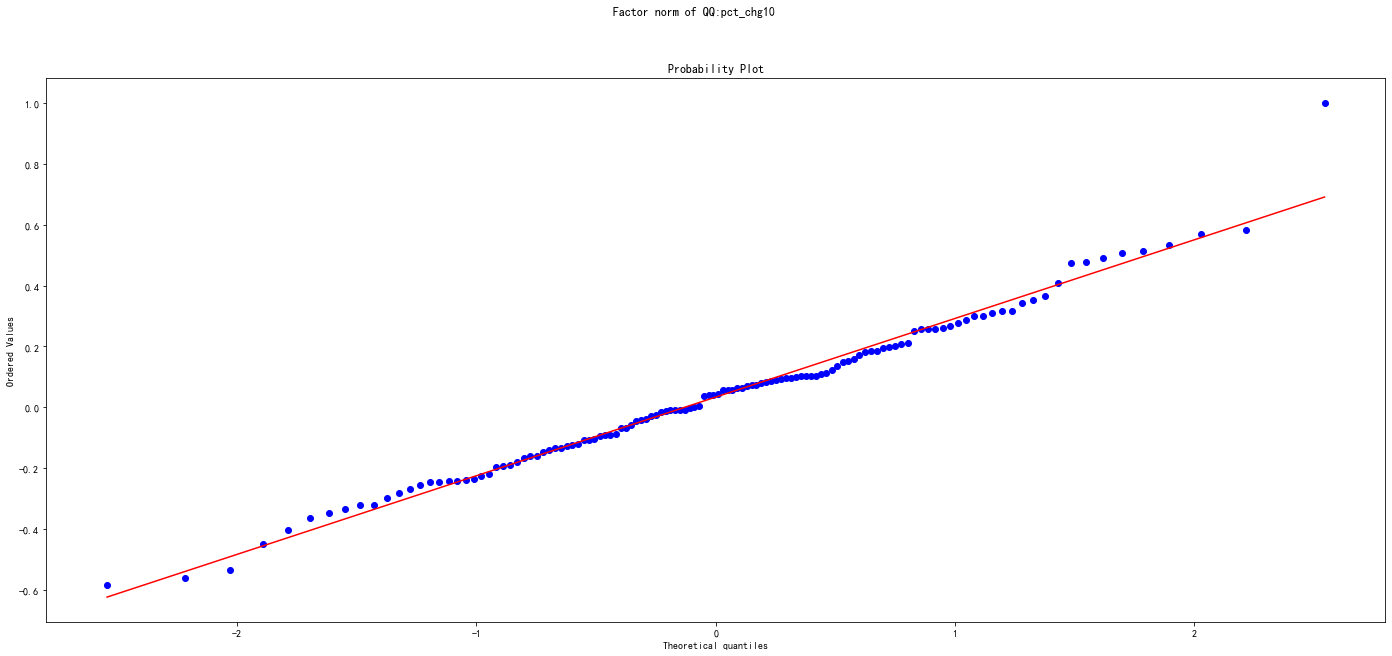

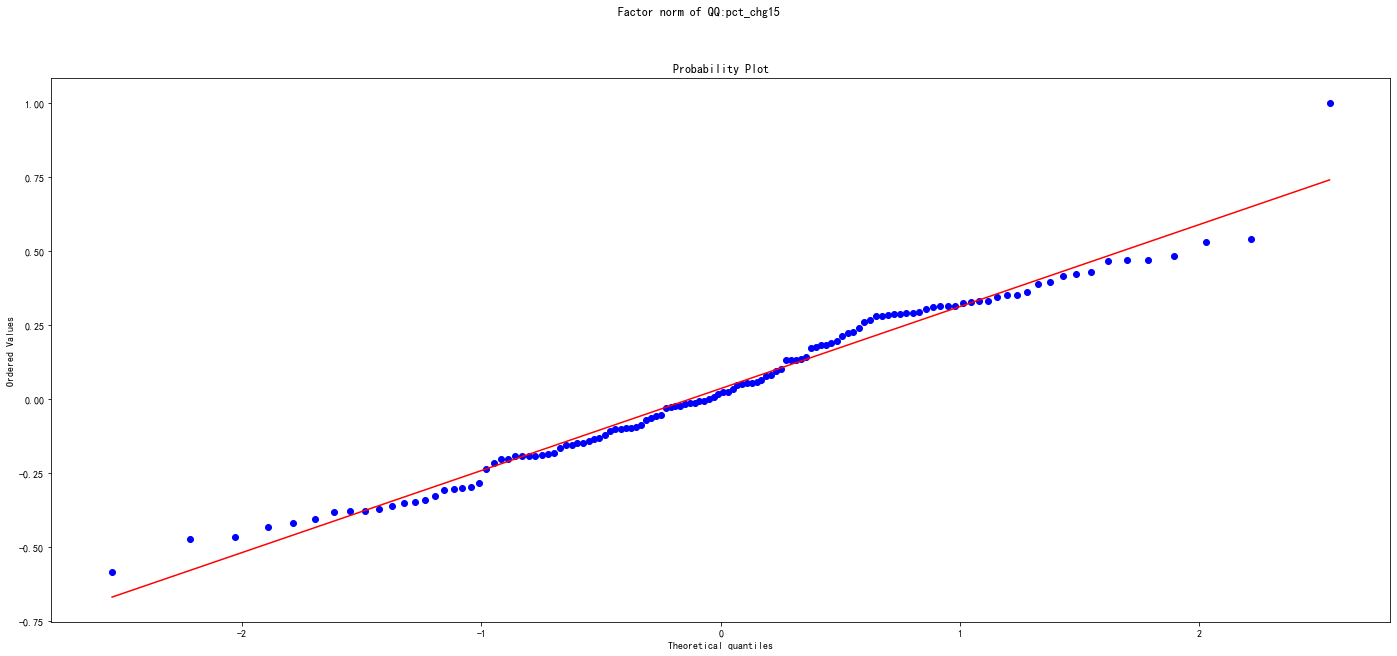

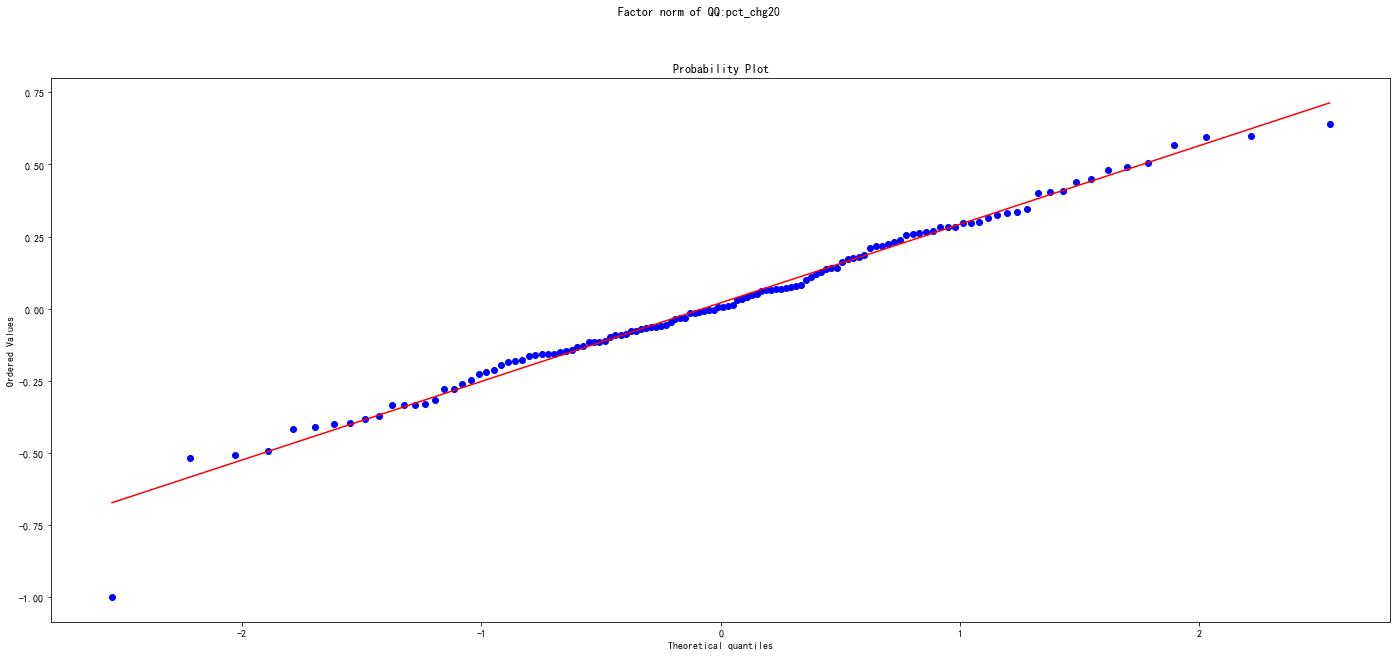

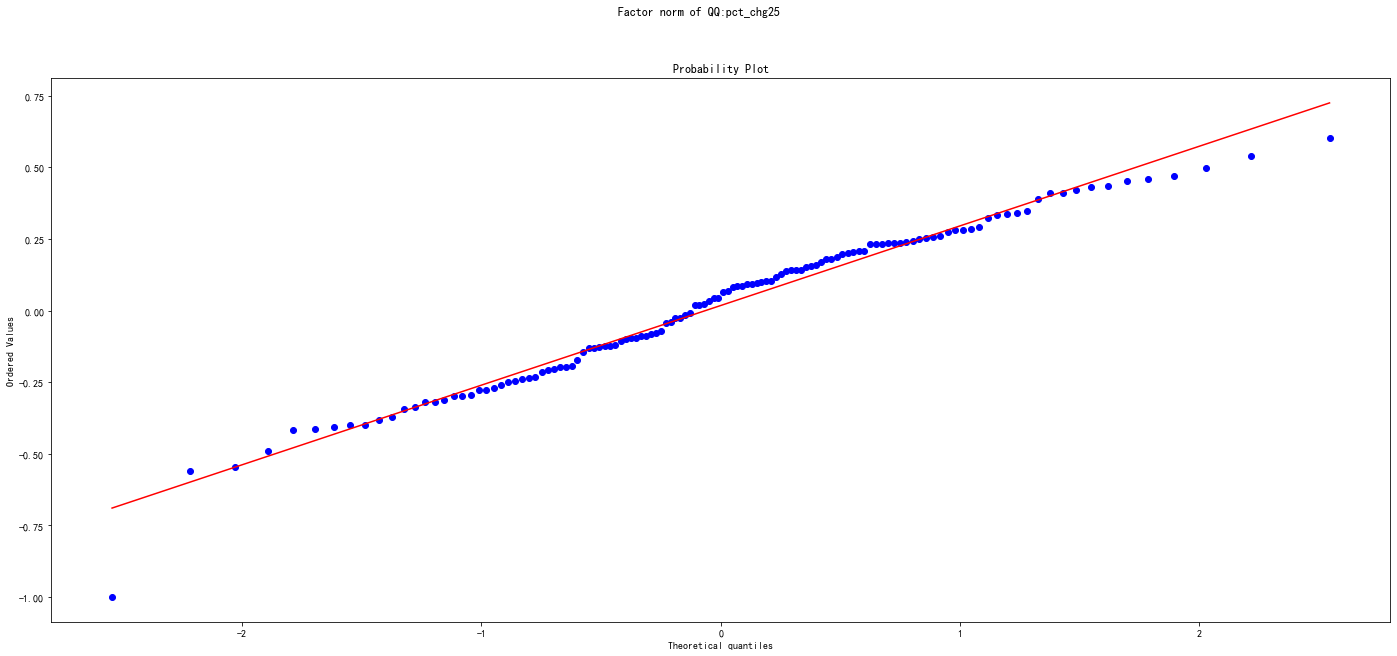

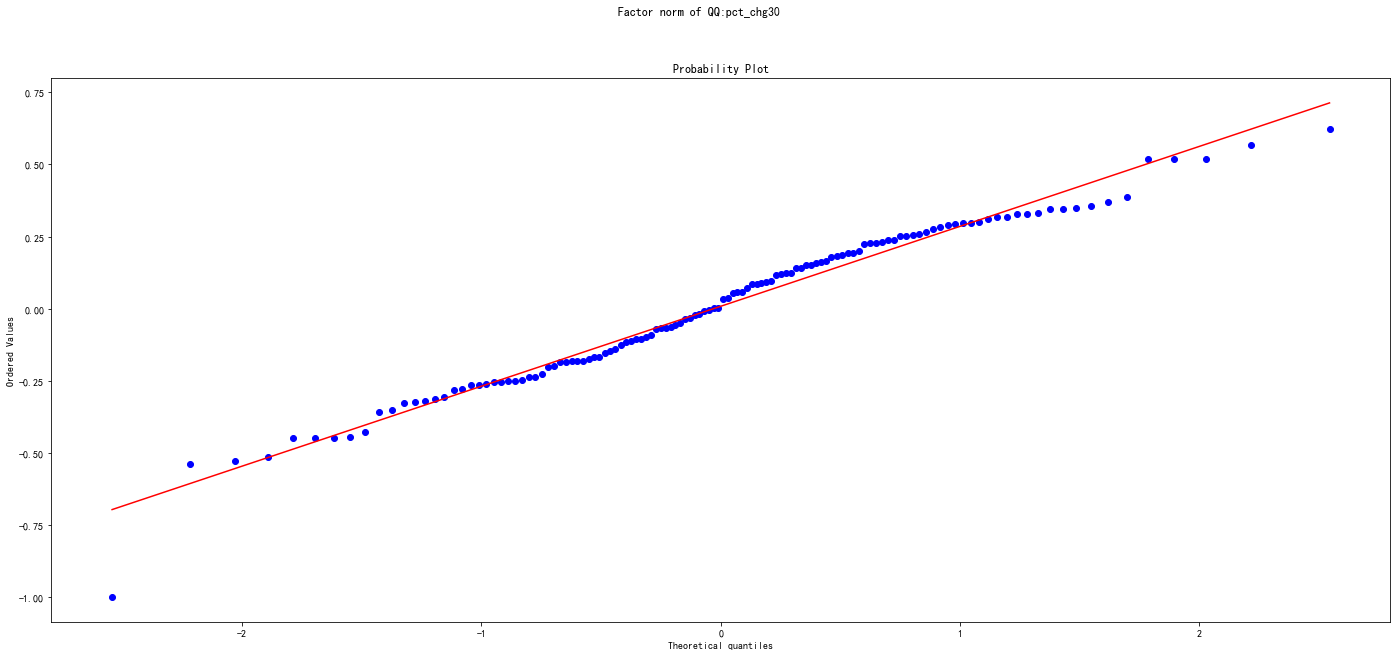

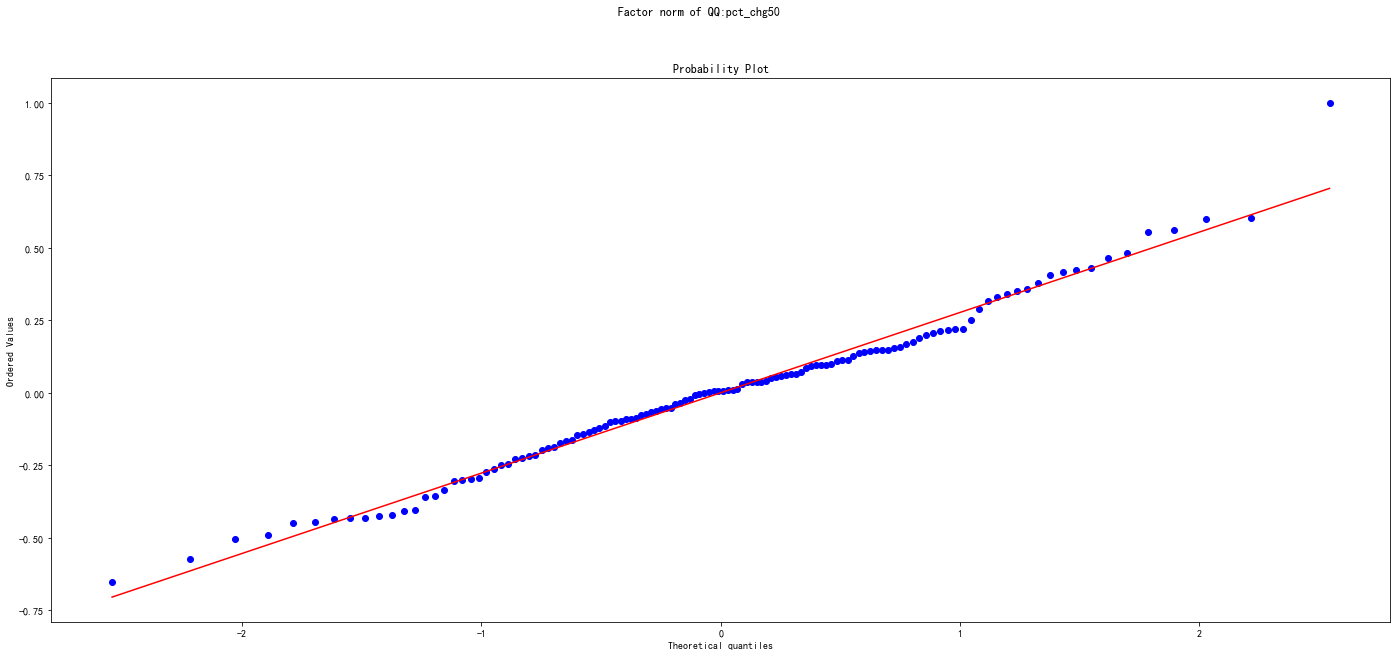

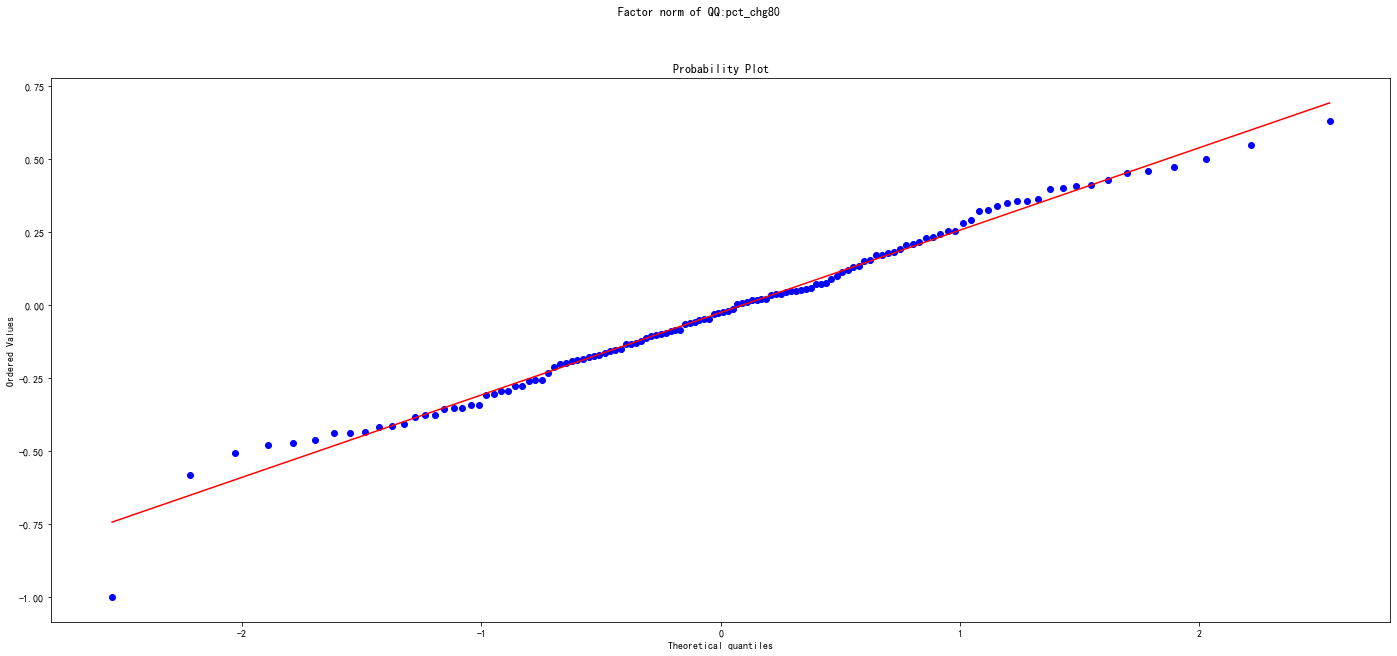

In [21]:
# QQ图
for fac in factor_list:
    plot_norm_of_qq(ic_, fac)

In [22]:
# 计算多因子的IC 与 ICIR
for fname in ic_.columns:
    print(fname + '  IC = {},ICIR = {}'.format(round(ic_[fname].mean(), 4),
                                               round(abs(ic_[fname].mean()) / ic_[fname].std() * np.sqrt(52), 4)))

open_chg  IC = 0.017,ICIR = 0.4955
pct_chg3  IC = -0.0007,ICIR = 0.0207
pct_chg5  IC = 0.0069,ICIR = 0.2029
pct_chg10  IC = 0.0338,ICIR = 0.947
pct_chg15  IC = 0.0353,ICIR = 0.9205
pct_chg20  IC = 0.0204,ICIR = 0.5431
pct_chg25  IC = 0.0175,ICIR = 0.4556
pct_chg30  IC = 0.0083,ICIR = 0.2168
pct_chg50  IC = -0.0001,ICIR = 0.0036
pct_chg80  IC = -0.0263,ICIR = 0.6763


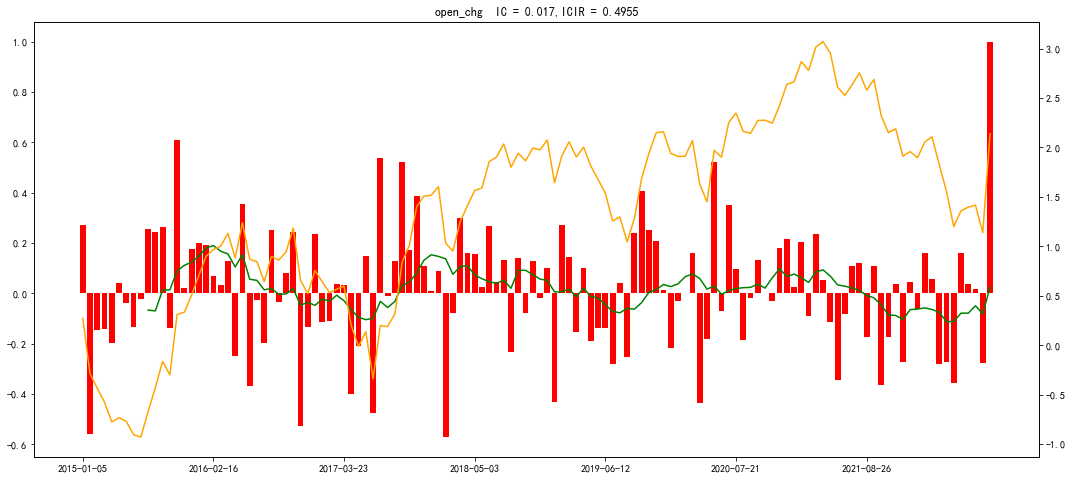

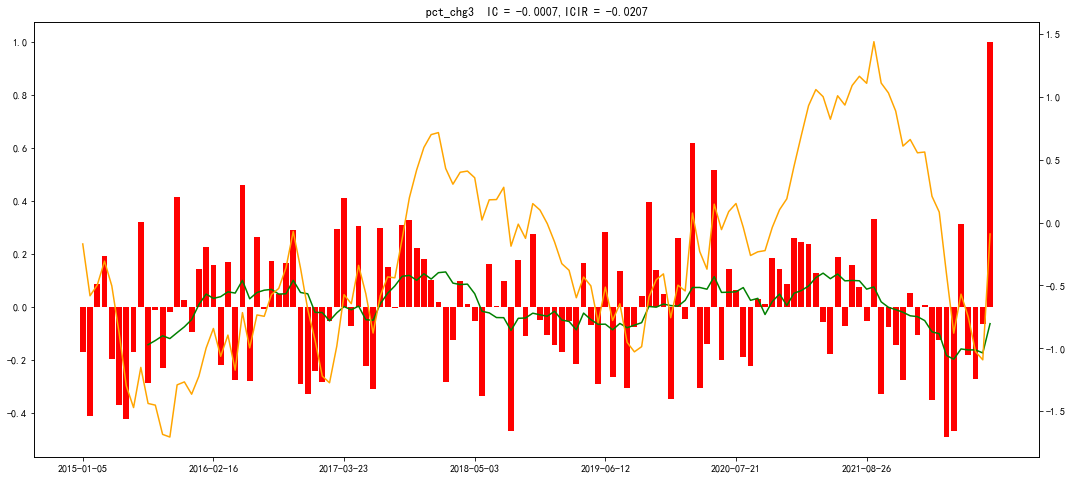

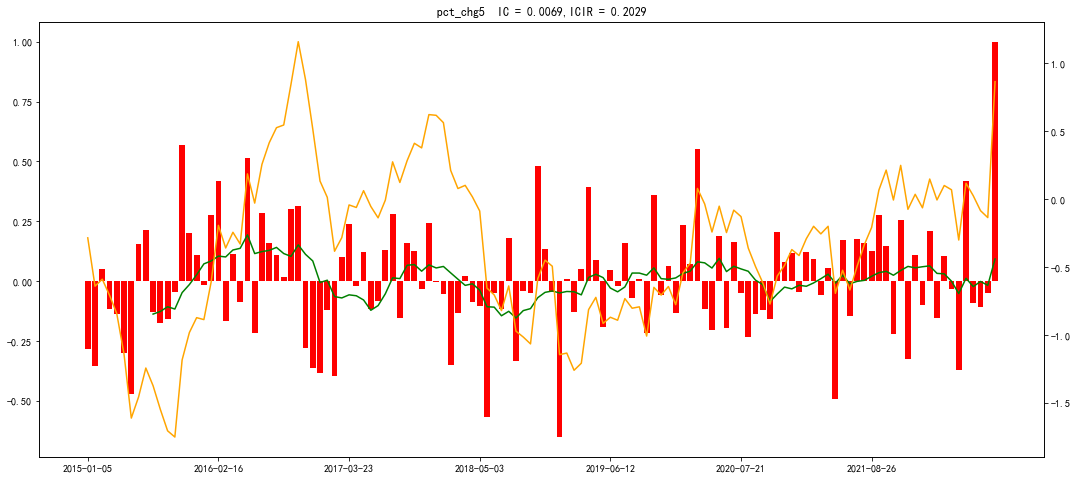

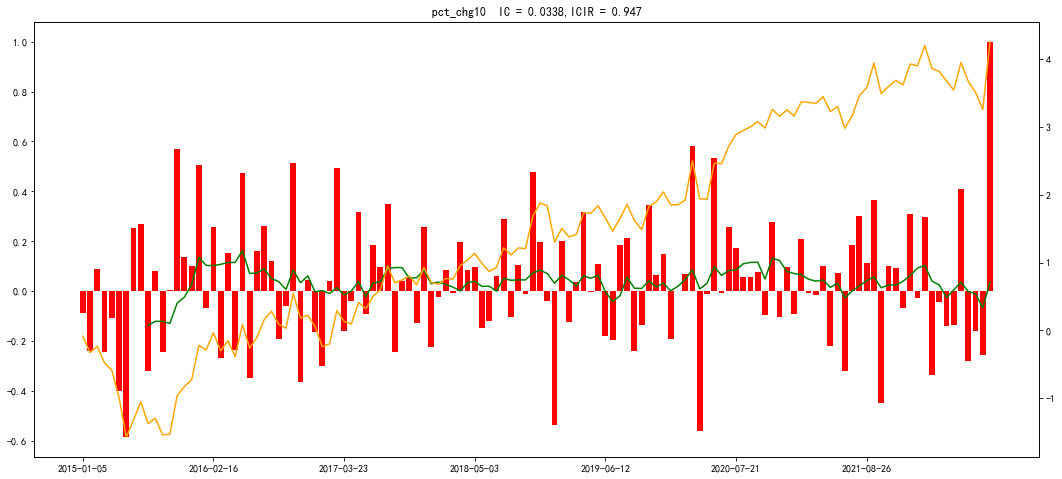

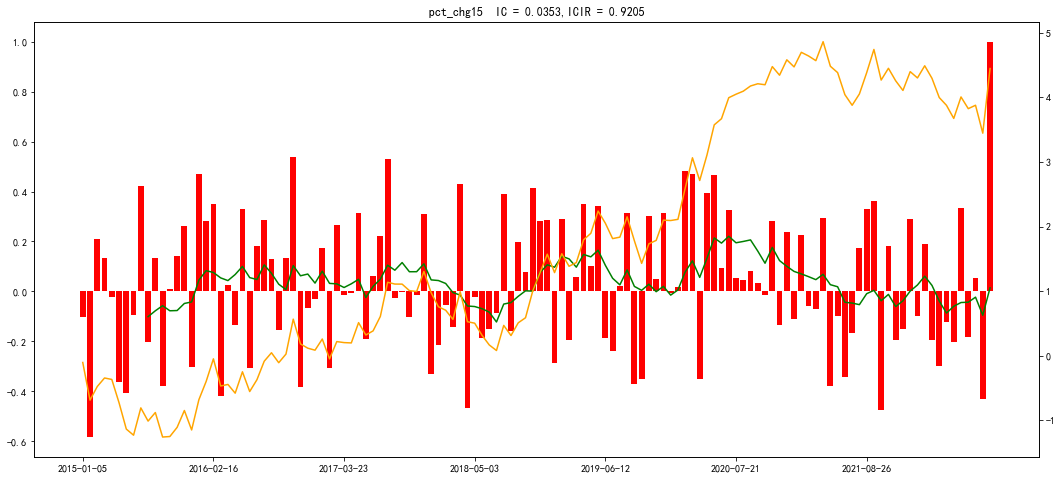

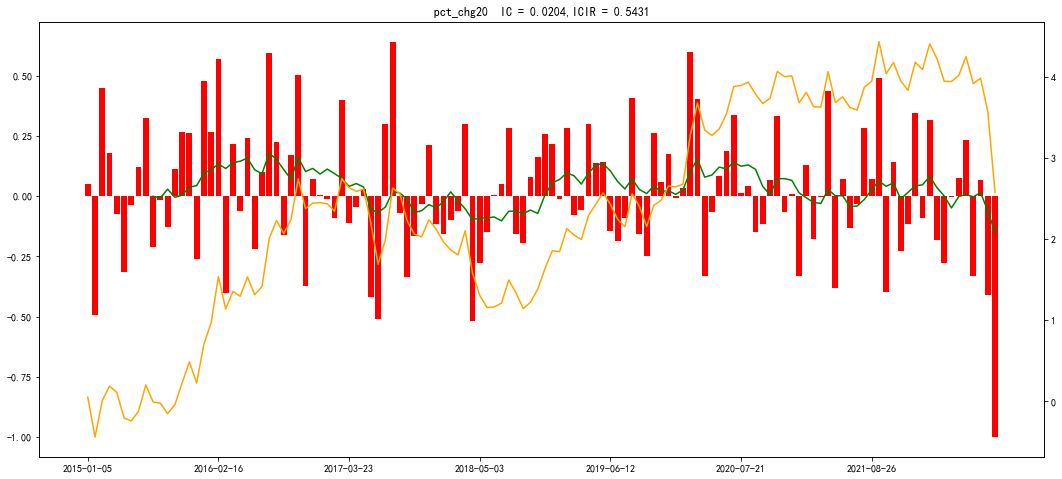

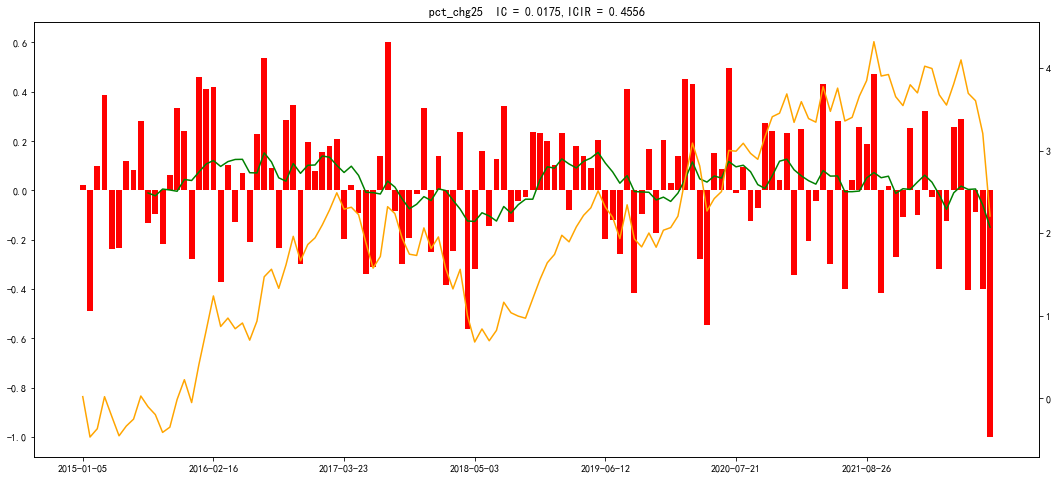

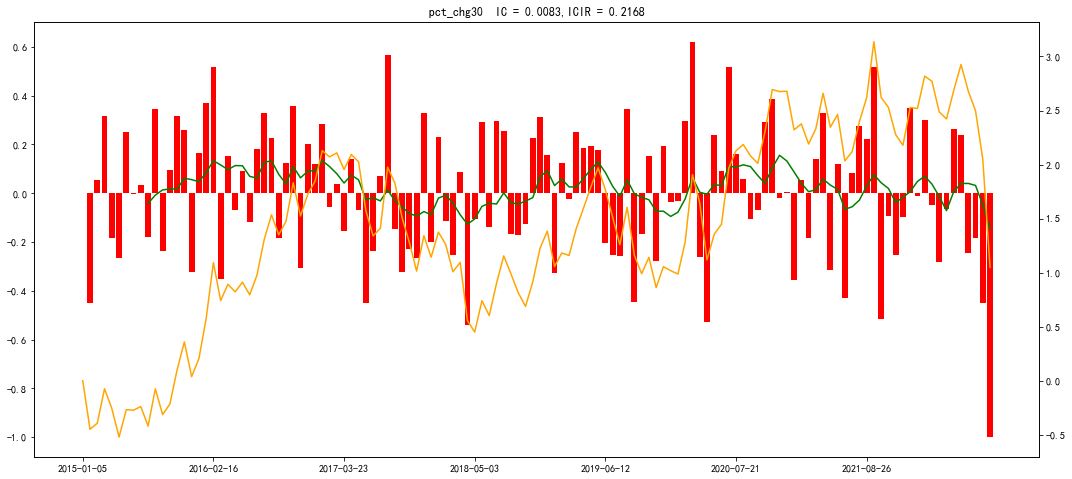

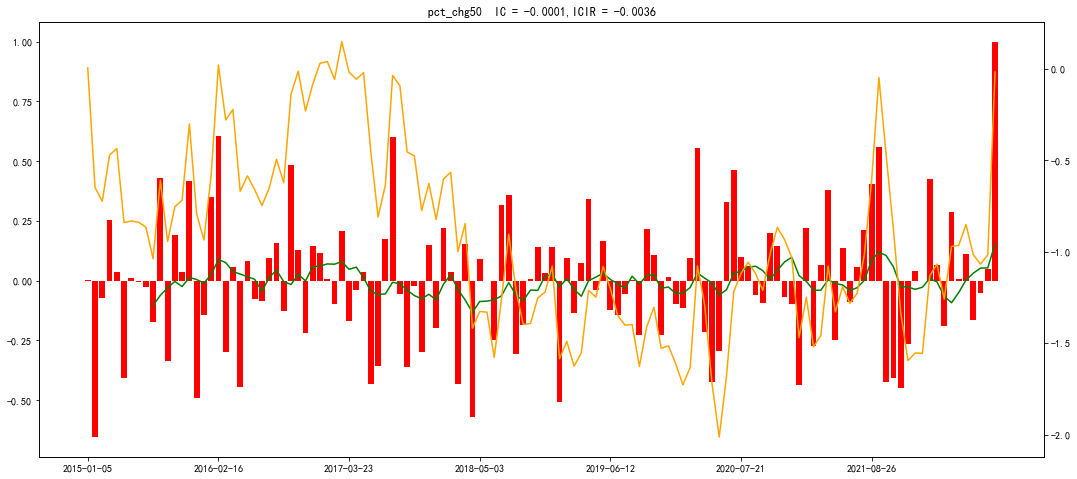

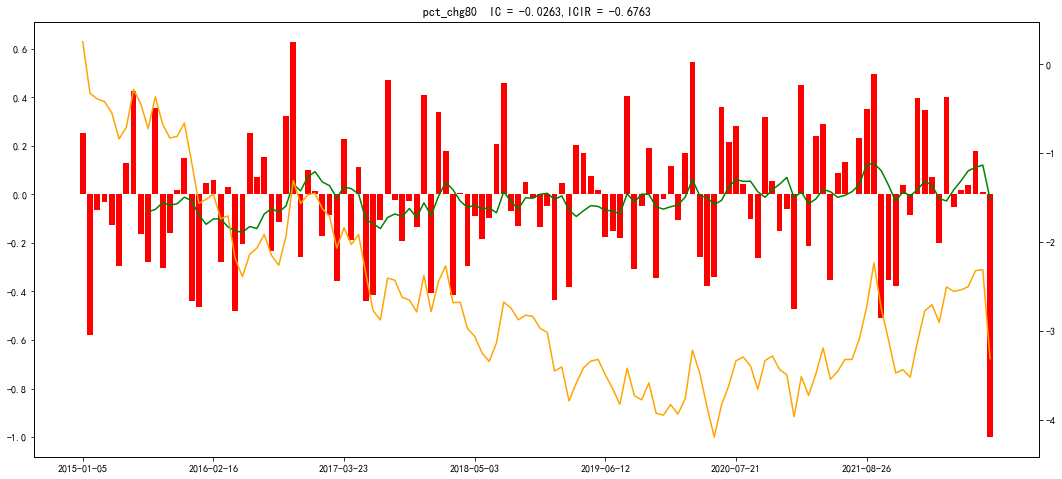

In [23]:
plotIC(ic_)

In [24]:
groups = 5
method = 'spearman'
f_ = df.copy()
f_.dropna(inplace=True)
ret = final_data[['Date', 'Ticker', 'pct_chg_5']].sort_values(['Date', 'Ticker',]).reset_index(drop=True)
f_

,Date,Ticker,open_chg,pct_chg3,pct_chg5,pct_chg10,pct_chg15,pct_chg20,pct_chg25,pct_chg30,pct_chg50,pct_chg80
0,2015-01-05,A9999.XDCE,0.002003,-0.006628,0.014207,0.042660,0.029533,0.042421,0.044357,0.049021,0.058143,0.029006
1,2015-01-26,A9999.XDCE,-0.006787,-0.015471,-0.023356,-0.026387,-0.023572,-0.009699,0.018083,0.005265,0.025428,0.011992
2,2015-02-16,A9999.XDCE,-0.010650,-0.008853,-0.010874,-0.008179,-0.005466,-0.028694,-0.031708,-0.028908,0.012286,0.027554
3,2015-03-16,A9999.XDCE,0.006017,-0.000956,-0.003098,-0.021535,-0.042819,-0.053228,-0.050647,-0.048051,-0.057284,-0.023844
4,2015-04-07,A9999.XDCE,-0.006528,-0.019577,-0.017874,-0.049953,-0.053589,-0.056522,-0.073970,-0.094114,-0.120108,-0.082984
...,...,...,...,...,...,...,...,...,...,...,...,...
120,2022-05-31,ZN9999.XSGE,0.000957,0.032098,0.036182,0.019680,0.018493,-0.058913,-0.075648,-0.057879,0.038120,0.058882
121,2022-06-22,ZN9999.XSGE,-0.010757,-0.018814,-0.019956,-0.036565,-0.034727,0.000198,-0.015731,-0.016876,-0.071763,0.018597
122,2022-07-13,ZN9999.XSGE,-0.033464,-0.033875,-0.009394,-0.056388,-0.100006,-0.117966,-0.132914,-0.131260,-0.182440,-0.098143
123,2022-08-03,ZN9999.XSGE,-0.012297,-0.011679,0.042912,0.049421,0.057059,0.047129,-0.002546,-0.048653,-0.048465,-0.116925


In [25]:
# 计算分组IC并画图
groupIC = getGroupICSeries(f_, ret, method, groups)
plotGroupIC(groupIC)

ValueError: Index contains duplicate entries, cannot reshape

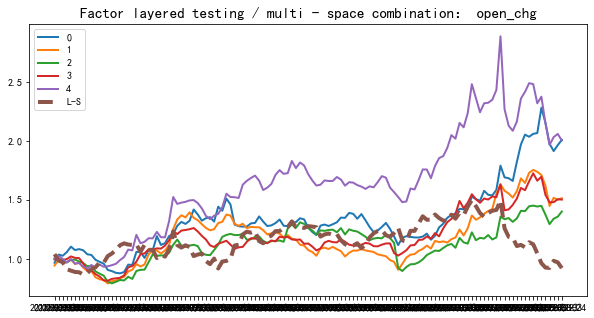

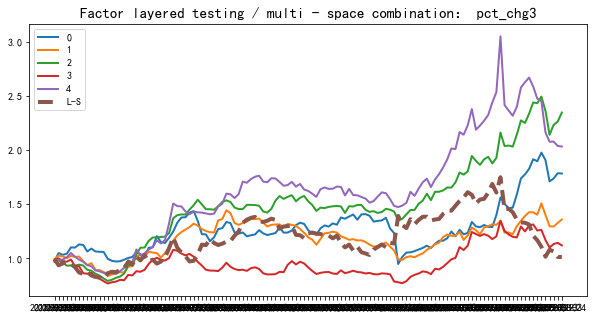

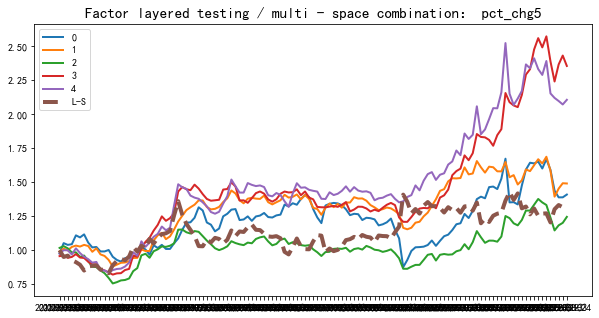

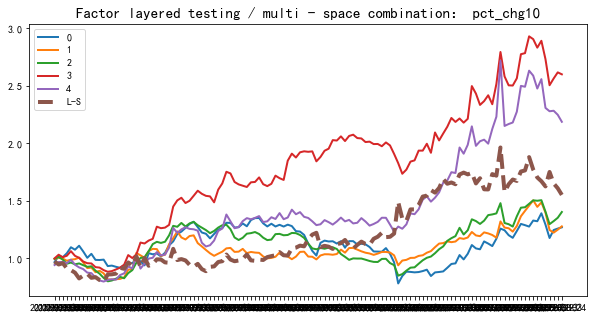

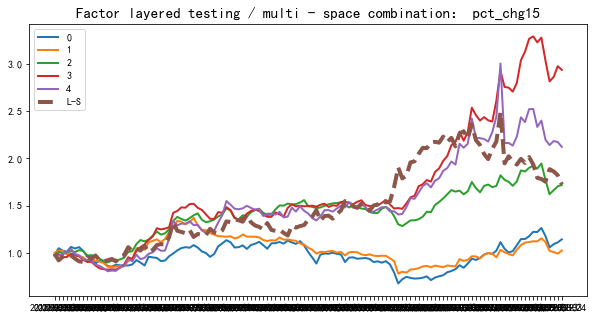

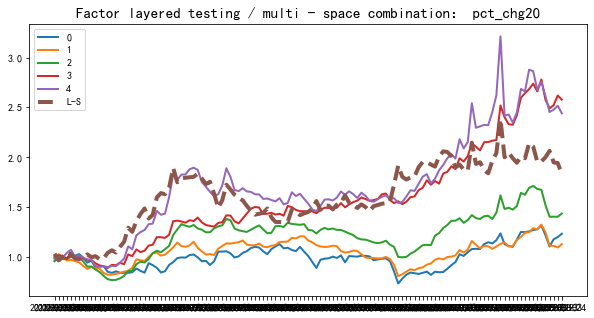

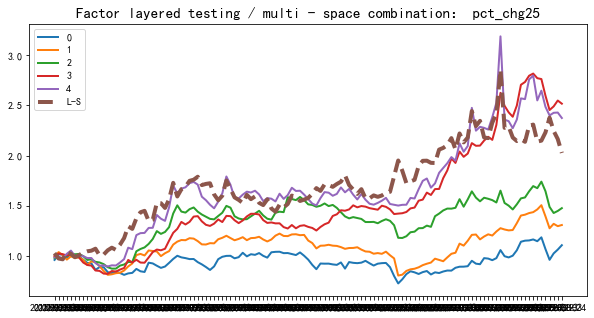

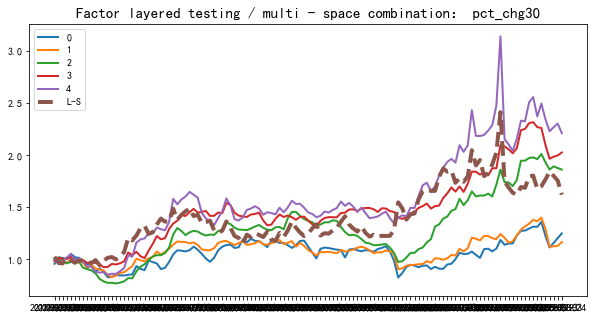

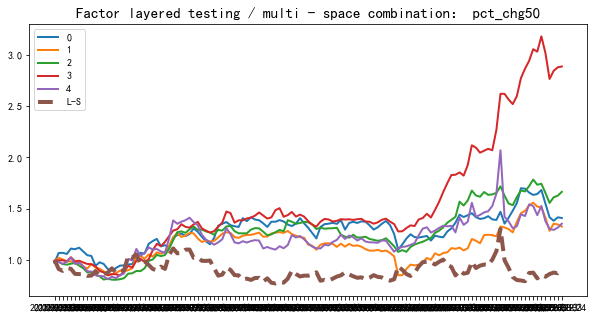

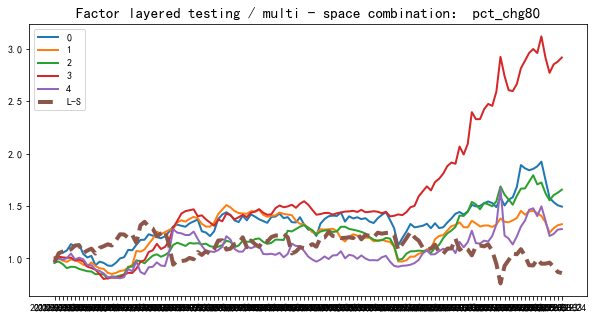

In [26]:
# 因子分组收益测试并画图
Groupnav = GroupTestAllFactors(f_, ret, groups)
plotnav(Groupnav)

In [27]:
fac_ret = getfactor_return(f_, ret)
fac_ret

,open_chg,pct_chg3,pct_chg5,pct_chg10,pct_chg15,pct_chg20,pct_chg25,pct_chg30,pct_chg50,pct_chg80
0,0.07724,0.075488,0.128608,0.133713,0.203769,0.239096,0.227605,0.134813,-0.000972,-0.03568


In [28]:
# 计算多因子的IC 与 ICIR
report_df = get_factor_icir_return(ic_, ic_value=0.07)
report_df

,factors,IC,IR,IC>0.07
0,open_chg,0.0170,0.4955,0.753968
1,pct_chg3,-0.0007,0.0207,0.809524
2,pct_chg5,0.0069,0.2029,0.793651
3,pct_chg10,0.0338,0.9470,0.785714
4,pct_chg15,0.0353,0.9205,0.809524
5,pct_chg20,0.0204,0.5431,0.769841
6,pct_chg25,0.0175,0.4556,0.888889
7,pct_chg30,0.0083,0.2168,0.857143
8,pct_chg50,-0.0001,0.0036,0.753968
9,pct_chg80,-0.0263,0.6763,0.777778


In [29]:
# 多因子相关性分析
corr_value_df,corr_df =  get_features_corr_data(ic_)
corr_df

,0,1,2,3
pct_chg3,pct_chg3,pct_chg5,None,None
pct_chg5,pct_chg3,pct_chg5,None,None
pct_chg10,pct_chg10,pct_chg15,None,None
pct_chg15,pct_chg10,pct_chg15,pct_chg20,None
pct_chg20,pct_chg15,pct_chg20,pct_chg25,pct_chg30
pct_chg25,pct_chg20,pct_chg25,pct_chg30,None
pct_chg30,pct_chg20,pct_chg25,pct_chg30,pct_chg50
pct_chg50,pct_chg30,pct_chg50,None,None
